In [83]:
import pickle
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)
from datasist.structdata import detect_outliers
import re
import joblib

>Arabic_stop_Word

In [2]:
strp={'شقة', 
'فيلا', 
'هاوس',
'تاون',
'توين',
'فى',
'و'
'علي'
'التجمع',
'in',
'فيو',
'م'
'في',
' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '\xa0',
 '²',
 '»',
 'Ã',
 'ã',
 '،',
 '\u061c',
  '؟', '\u200e',
 '\u200f',
 '–',
 '’',
 '“',
 '”',
 '•',
 '⁸',
 '我'}

In [3]:
with open("./apartmant.pkl",'rb') as file:
        apartmant,stack2,link2=pickle.load(file)
df=pd.DataFrame(apartmant)
df.rename(columns={'data': 'date'},inplace=True, errors='raise')
df.drop('Down Payment',inplace=True,axis=1)


len(apartmant)

20317

***Cleaning***


In [4]:
df['date']=df['date'].apply(lambda x: x.strip())
df['date']=pd.to_datetime(df['date'], format="%d %B %Y")
df['month']= pd.DatetimeIndex(df['date']).month

In [5]:
z=list(df.columns)
x=['price','location','date','title','link','viwers','negotiable','cat','month']
selected=[i for i in z if i not in x ]
selected

['Bedrooms',
 'Bathrooms',
 'Area (m²)',
 'Level',
 'Type',
 'Payment Option',
 'Amenities',
 'Furnished',
 'Delivery Date',
 'Compound',
 'Delivery Term']

In [6]:
df.isnull().sum()

price                 0
location              0
date                  0
title                 0
link                  0
viwers                0
negotiable            0
Bedrooms              0
Bathrooms             0
Area (m²)             0
Level                 0
Type                  1
Payment Option     3940
Amenities          5999
Furnished          6764
Delivery Date      7375
Compound          14233
Delivery Term      9703
month                 0
dtype: int64

In [7]:
for i in selected:
    print(df[i].value_counts())
    print("*"*80)

[3]      12292
[2]       5551
[4]       1630
[1]        520
[5]        221
[6]         63
[7]         15
[8]         10
[10+]        9
[10]         4
[9]          2
Name: Bedrooms, dtype: int64
********************************************************************************
[2]      7675
[1]      6778
[3]      5249
[4]       521
[5]        56
[6]        18
[8]         7
[7]         6
[10]        4
[10+]       2
[9]         1
Name: Bathrooms, dtype: int64
********************************************************************************
[120]        743
[140]        742
[100]        665
[150]        647
[90]         628
            ... 
[367]          1
[805,000]      1
[5,000]        1
[166.44]       1
[388]          1
Name: Area (m²), Length: 437, dtype: int64
********************************************************************************
[2]          4189
[3]          3396
[1]          2951
[Ground]     2761
[4]          2011
[5]          1512
[6]           771
[7]           573
[10+]

In [8]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return np.nan
     
for i in selected:
    df[i]=df[i].apply(xx)

In [9]:
df['Amenities']

0                                                      NaN
1        Balcony Built in Kitchen Appliances Private Ga...
2        Balcony Covered Parking Maids Room Pets Allowe...
3        Balcony Private Garden Security Covered Parkin...
4                                                      NaN
                               ...                        
20312                                                  NaN
20313                                             Elevator
20314               Security Electricity Meter Water Meter
20315    Balcony Covered Parking Pets Allowed Security ...
20316                                                  NaN
Name: Amenities, Length: 20317, dtype: object

In [10]:
for i in selected:
    print(i)
    print(df[i].unique())
    print("*"*80)

Bedrooms
['3' '2' '4' '5' '6' '1' '10+' '7' '8' '10' '9']
********************************************************************************
Bathrooms
['2' '4' '3' '1' '5' '7' '6' '10+' '8' '10' '9']
********************************************************************************
Area (m²)
['160' '119' '130' '320' '115' '250' '136' '175' '172' '134' '310' '220'
 '210' '110' '200' '233' '170' '180' '156' '140' '265' '240' '360' '219'
 '165' '135' '154' '196' '194' '107' '162' '224' '199' '145' '178' '75'
 '120' '188' '80' '186' '112' '155' '97' '116' '521' '65' '143' '150'
 '100' '125' '131' '189' '106' '190' '85' '185' '96' '50' '55' '148' '67'
 '276' '300' '63' '235' '206' '202' '238' '124' '129' '60' '95' '114'
 '205' '315' '146' '137' '90' '132' '81' '94' '105' '355' '72' '70' '215'
 '212' '74' '10' '158' '91' '174' '127' '157' '280' '191' '153' '230'
 '108' '1,000' '69' '177' '118' '340' '58' '260' '126' '64' '56' '68'
 '350' '78' '168' '164' '123' '77' '128' '278' '54' '580' '103' '

In [11]:
df['Delivery Date'].value_counts()

Ready to move      9990
soon                923
2024                682
2023                495
2022                283
within 6 months     265
2025                255
2026                 44
2029                  3
2030                  1
2028                  1
Name: Delivery Date, dtype: int64

fill_Nulls

In [12]:
def date(words):
  chars=[{'ا', 'ل', 'ن'}, {'ر', 'ف', 'و', 'ي'}, {'ا', 'ت', 'س', 'ل', 'م'}]
  x=[{x for x in i if i not in strp}for i in words.split(" ")]
  for i in x:
        if set(chars[2]).issubset(i) and re.search(r'(\d{4})',words):
                  return re.findall(r'(\d{4})',words)[0]
        if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
              return 'Ready to move'

  return np.nan
df.loc[df['Delivery Date'].isnull(),'Delivery Date']=df.loc[df['Delivery Date'].isnull(),'title'].apply(date)

In [13]:
df.loc[df['Delivery Date']=='2027','Delivery Date']='2026'

In [14]:
df.loc[df['Delivery Date'].isin(['1050',                 
'4750'  ,               
'8500' ,                
'١١٢٣' ,                
'1000' ,                
'1500' ,                
'2500' ,                  
'٢٠٢٧' ,                
'7920' ,                
'٢٠٢١']),'Delivery Date']=np.nan

In [15]:
def counter(z,sep):
    from collections import Counter
    sv=[]
    for i in z:
        for i in i.split(sep):
            if i not  in strp:
                sv.append(i)
    return dict(sorted(dict(Counter(sv)).items(), key=lambda item: item[1],reverse=True))

In [16]:
counter(df['title'],' ')

{'للبيع': 10583,
 'شقه': 7224,
 'في': 4916,
 'متر': 1881,
 'من': 1565,
 'لوكس': 1436,
 'كمبوند': 1245,
 'سوبر': 1237,
 'الخامس': 1188,
 'التجمع': 1170,
 'استلام': 1152,
 'علي': 1091,
 'م': 1091,
 'شارع': 1079,
 'تشطيب': 1008,
 'على': 975,
 'فوري': 906,
 'بسعر': 898,
 'مميز': 893,
 'بمقدم': 892,
 'بالتقسيط': 772,
 'بكمبوند': 751,
 'و': 746,
 'دوبلكس': 705,
 'اكتوبر': 696,
 'امتلك': 630,
 'زايد': 626,
 'لقطه': 591,
 'شقتك': 589,
 'سنوات': 586,
 'دور': 577,
 'موقع': 572,
 'بجوار': 550,
 'جاردن': 521,
 'الجديدة': 487,
 'سعر': 462,
 'الحي': 456,
 'مقدم': 455,
 'امام': 451,
 'سنين': 448,
 'لقطة': 446,
 'الشيخ': 432,
 'المالك': 410,
 'ارضي': 402,
 'بالتجمع': 398,
 'sale': 397,
 'فورى': 392,
 'مصر': 392,
 'for': 387,
 '6': 386,
 'جدا': 384,
 'مدينة': 382,
 'الف': 367,
 'Apartment': 365,
 'متشطبة': 363,
 'بجاردن': 358,
 'اول': 358,
 'ب': 349,
 'الجديده': 339,
 'ع': 338,
 'غرف': 331,
 'قسط': 328,
 '8': 327,
 'سوديك': 321,
 'تمليك': 320,
 '10%': 316,
 'نصر': 315,
 'الوطن': 312,
 'الرئيسي': 307,
 

In [17]:
chars=[{'ا','س','ت','ل','م'},{'ش','ا','ط','ب'},{'ق' ,'س','ط'},{'ك','ش','ا'}]
for  i in chars:
    print(i)

{'ا', 'ل', 'ت', 'س', 'م'}
{'ا', 'ب', 'ش', 'ط'}
{'ق', 'س', 'ط'}
{'ك', 'ا', 'ش'}


In [18]:
df['Compound']=df['Compound'].fillna('not_in_Compound')
Compound=df['Compound'].unique().tolist()
st=set()
for i in df[df['Compound'].isnull()]['location']:
    for x in Compound:
        if type(x) != float and x in i:
            st.add(i)
            continue 
st=list(st)

In [19]:
def x(z):
    if z['location']in st and pd.isnull(z['Compound']):
        return z['location'].split('،')[0]
    else:
        return np.nan
df.loc[df['Compound'].isnull(),'Compound']=df.apply(x,axis=1)

In [20]:
def cash_extractor(words):
  if pd.notnull(words) or pd.notna(words):
    chars=[{'ق' ,'س','ط'},{'م','ق','د'}]
    x=[{x for x in i if i not in strp}for i in words.split(" ")]
    for i in x:
          if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
                return 'Installment'
    return 'Cash'
  else:
    return np.nan
df.loc[df['Payment Option'].isnull(),'Payment Option']=df.loc[df['Payment Option'].isnull(),'title'].apply(cash_extractor)

In [21]:
def extr(i):      
      if 'نص' in i and 'شطيب' in i or 'متشطب'in i:
        return 'Semi Finished'
      elif 'شطيب' in i or 'متشطب'in i  and ('سوبر' in i or 'فرش' in i or 'مفتاح' in i or 'كامل' in i or  'لوكس'in i or 'الترا'in i or'مميز' in i or'ممتاز' in i or'راقي' in i):
             return 'Finished' 
df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)

C:\Users\Moham\AppData\Local\Temp\ipykernel_12012\780014698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df[['Delivery Date','Delivery Term']] = imputer.fit_transform(df[['Delivery Date','Delivery Term']])


In [23]:
imputer = SimpleImputer(strategy='most_frequent')
df['Furnished'] = imputer.fit_transform(df[['Furnished']])

In [24]:
df['Furnished']=df['Furnished'].map({'No':0,'Yes':1})

In [25]:
df['Compound']=df['Compound'].fillna('not')

In [26]:
df.shape

(20317, 19)

>clean_numrical_columns

In [27]:
def x(z):
    if z=='10+':
            return 10
    else:  
        try:
            return int(z)
        except Exception as e:
            print(e)
            return z
    
df['Bathrooms']=df['Bathrooms'].apply(x)
df['Bedrooms']=df['Bedrooms'].apply(x)

In [28]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
df['price']=         df['price'].apply(x)
df['Area (m²)']=     df['Area (m²)'].apply(x)
df['Area (m²)']=     df['Area (m²)'].astype(int)
df['negotiable'] =   df['negotiable'].astype(int)
df['viwers'] =       df['viwers'].astype(int)

In [29]:
def x(z):
    try:
        return int(z)
    except:
        if z=='Ground':
            return 0
        elif z=='Highest':
            return 11
        elif z=='10+':
            return 10
        else:
            print(z)
            return z
df['Level']=df['Level'].apply(x)

In [30]:
df['meter_price']=round(df['price']/df['Area (m²)'],2)

***Feature Engineering***

In [31]:
rows=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
df[rows]=[0 for i in range(len(rows))]

In [32]:
def xvc(z):
    c={'in', 'Appliances', 'heating', 'Private', 'Central', 'Room', 'Allowed', '&', 'Meter','Built'}
    m=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=set(z.split())
            z= z ^ c
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)   
df[rows]=df['Amenities'].apply(xvc)

In [33]:
df.loc[df['Amenities'].isnull(),rows]=[0 for i in range(len(rows))] 

In [34]:
df.shape

(20317, 36)

>categorical outliers

In [35]:
cat_outliers=[]
for k,v in df['location'].value_counts().items():
    if v <10:
        cat_outliers.append(k)
df.drop(df[df['location'].isin(cat_outliers)].index,inplace=True)

In [36]:
cat_outliers=[]
for k,v in df['Compound'].value_counts().items():
    if v<10:
        print(v)
        cat_outliers.append(k)
df.drop(df[df['location'].isin(cat_outliers)].index,inplace=True)

9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [37]:
cat_outliers=[]
for k,v in df['Compound'].value_counts().items():
    if v <10:
        cat_outliers.append(k)
df.drop(df[df['Compound'].isin(cat_outliers)].index,inplace=True)

In [38]:
for  i in ['Bedrooms','Bathrooms' ,'Delivery Date']:
    cat_outliers=[]
    for k,v in df[i].value_counts().items():
        if v <50:
            cat_outliers.append(k)
        df.drop(df[df[i].isin(cat_outliers)].index,inplace=True)

In [39]:
df.drop('title',inplace=True,axis=1)
df.drop('link',inplace=True,axis=1)

In [40]:
df.reset_index(drop=True, inplace=True)

In [41]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Level                0
Type                 1
Payment Option       0
Amenities         5625
Furnished            0
Delivery Date        0
Compound             0
Delivery Term        0
month                0
meter_price          0
Parking              0
Landline             0
Covered              0
A/C                  0
Gas                  0
Security             0
Natural              0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

<AxesSubplot:xlabel='Area (m²)'>

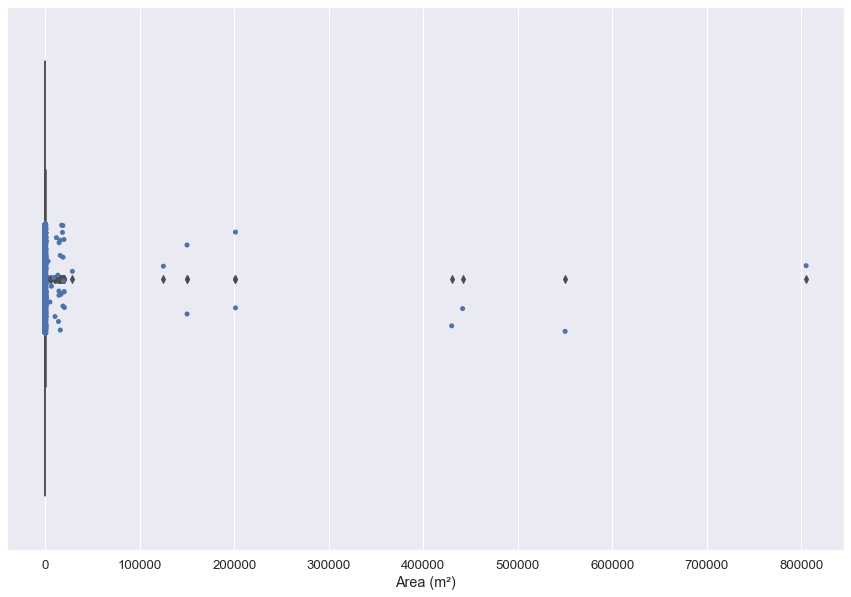

In [42]:
sns.boxplot(x="Area (m²)", data=df)
sns.stripplot(x="Area (m²)", data=df)

In [43]:
for i in ['Bathrooms','Bedrooms']:
    df[i]=df[i].astype(int)

In [44]:
idx = ["price",'Area (m²)']
outliers_indices = detect_outliers(df, 0, idx)
df.drop(outliers_indices,inplace=True,axis=0)
len(outliers_indices)

1411

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

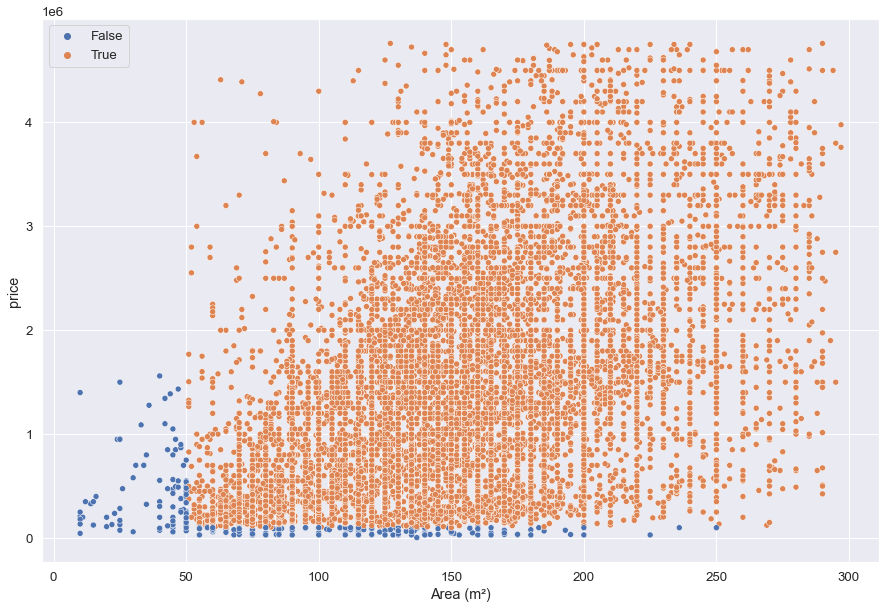

In [45]:
upper=5_000_000
lower=100_000
upper_a=600
lower_a=50
flt_p=((df['price']<upper) & (df['price']>lower))
flt_a=(df['Area (m²)']>lower_a) & (df['Area (m²)']<upper_a)
sns.scatterplot(x="Area (m²)",y='price', data=df, hue=flt_a & flt_p)

In [46]:
df=df[((df['price']<upper) & (df['price']>lower)) & (df['Area (m²)']>lower_a) & (df['Area (m²)']<upper_a)]

clean bussines outliers


<AxesSubplot:xlabel='price'>

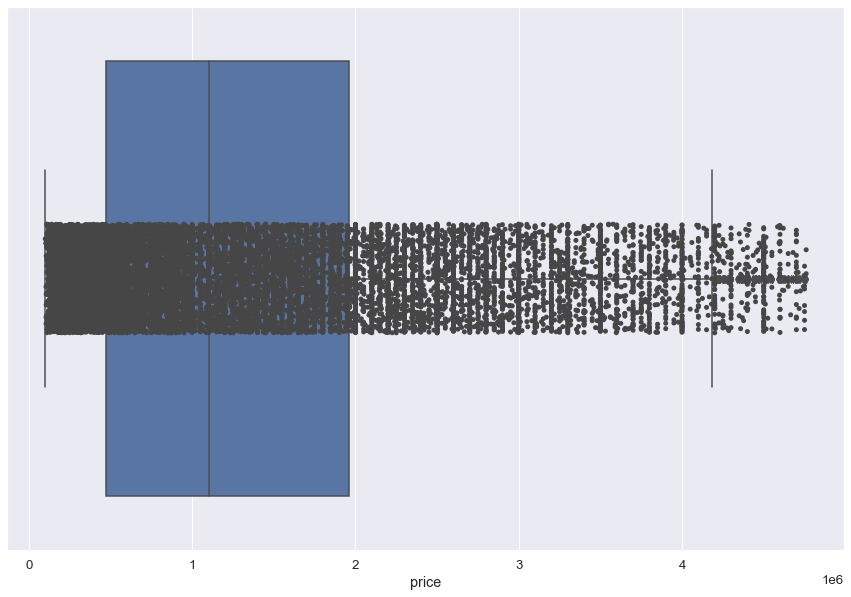

In [47]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

In [48]:
df.shape

(17109, 34)

<AxesSubplot:xlabel='price'>

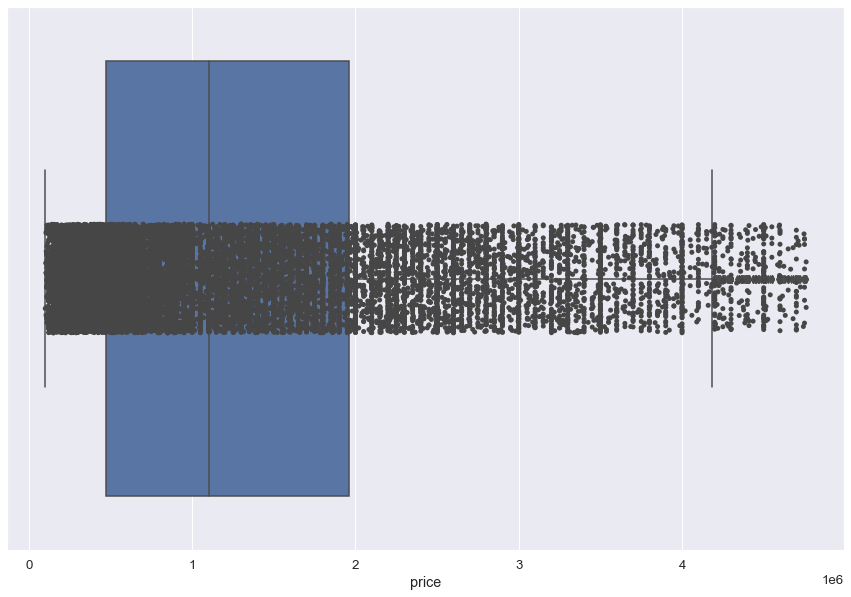

In [49]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

In [50]:
df.reset_index(drop=True, inplace=True)

sss

>> what is the most common type of villas

<AxesSubplot:xlabel='Type', ylabel='count'>

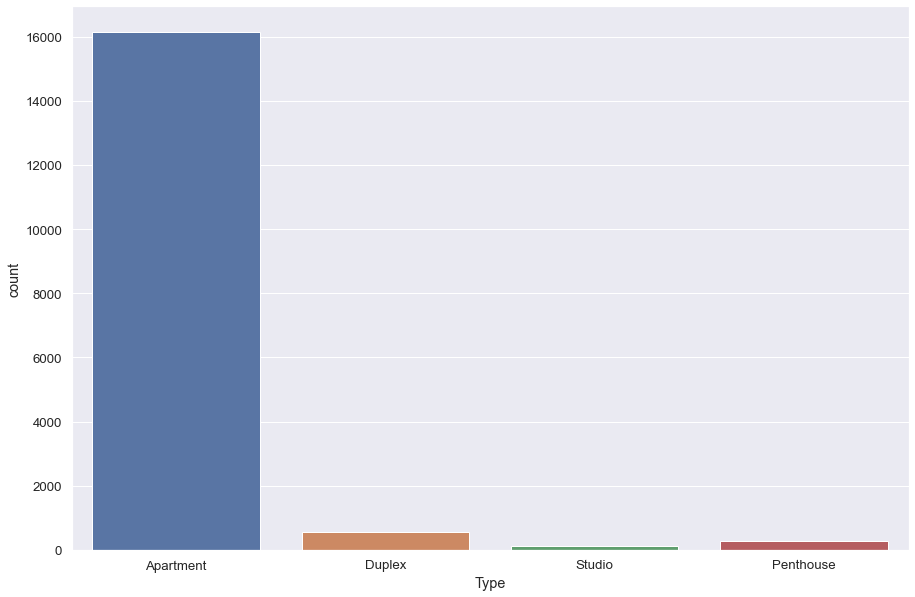

In [51]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df)


>**is Stand Alone Villa**

>>what is the most common structure for the villas

<AxesSubplot:xlabel='Type', ylabel='count'>

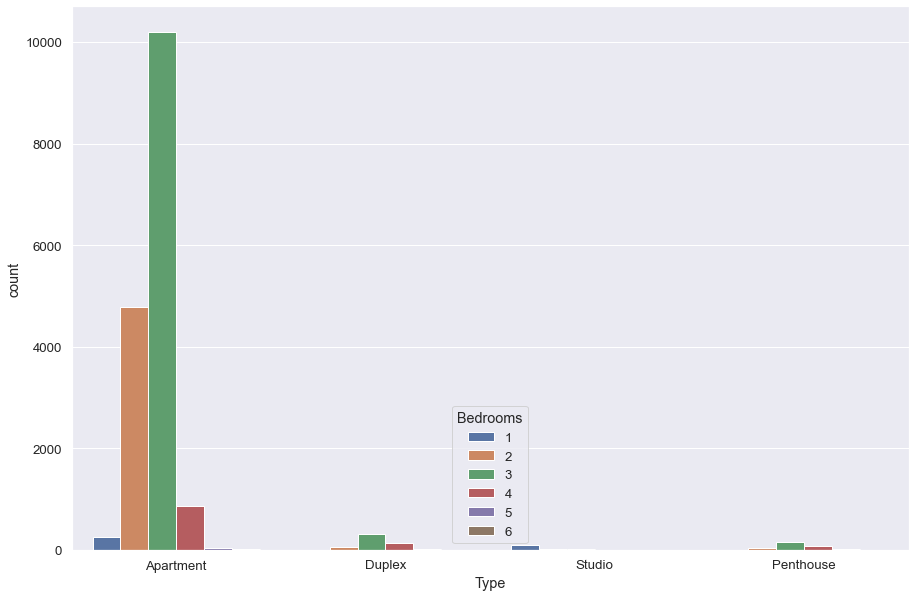

In [52]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

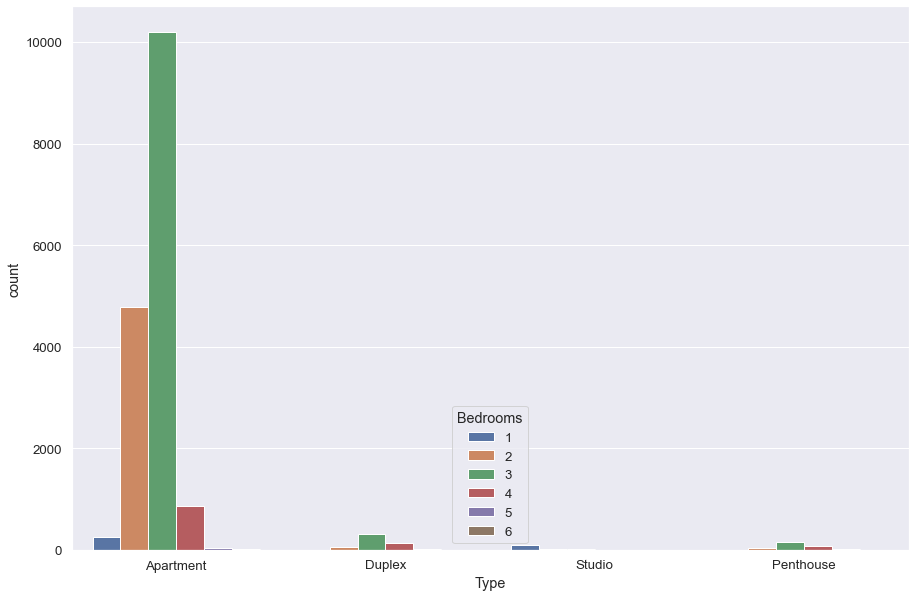

In [53]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

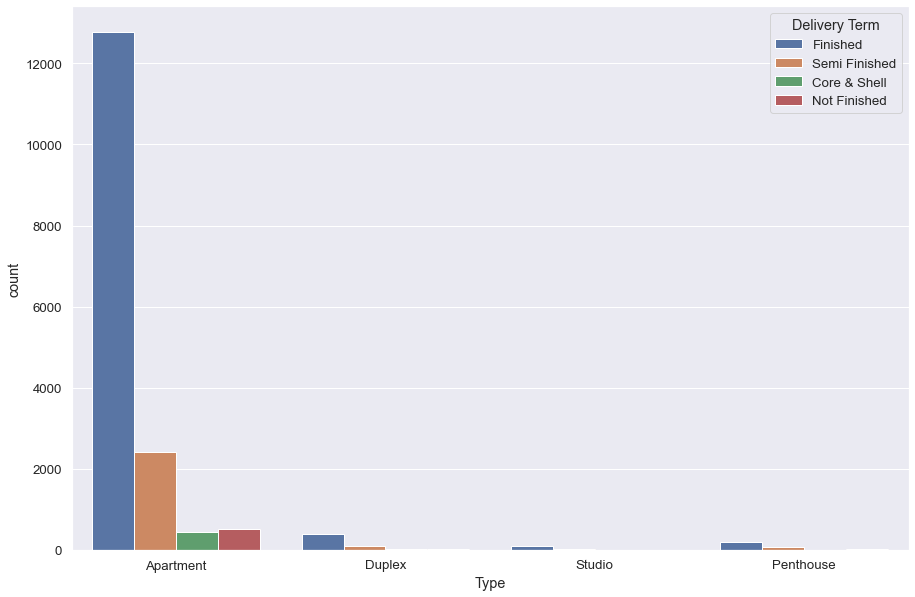

In [54]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Delivery Term")


<AxesSubplot:xlabel='Type', ylabel='count'>

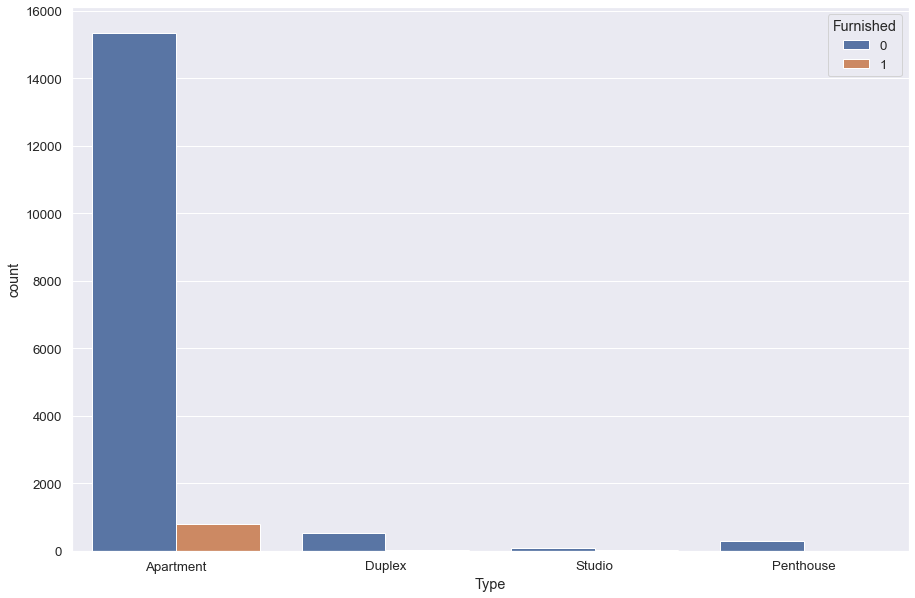

In [55]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option"]
sns.countplot(x='Type', data=df ,hue="Furnished")


Finished         0.787013
Semi Finished    0.152785
Not Finished     0.032556
Core & Shell     0.027646
Name: Delivery Term, dtype: float64


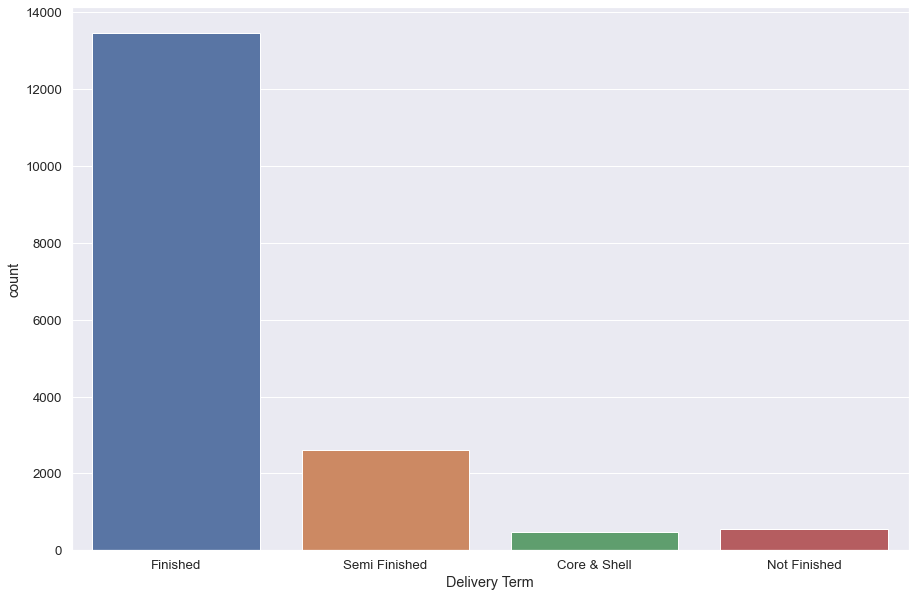

Ready to move      0.860307
soon               0.045765
2024               0.032498
2023               0.024022
2022               0.012683
2025               0.012450
within 6 months    0.012274
Name: Delivery Date, dtype: float64


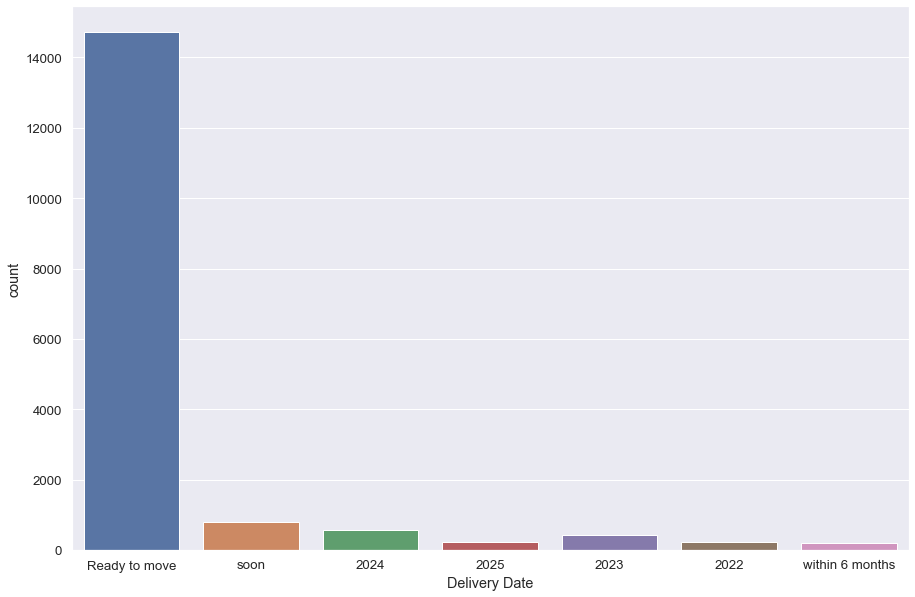

Cash                   0.651528
Cash or Installment    0.237886
Installment            0.110585
Name: Payment Option, dtype: float64


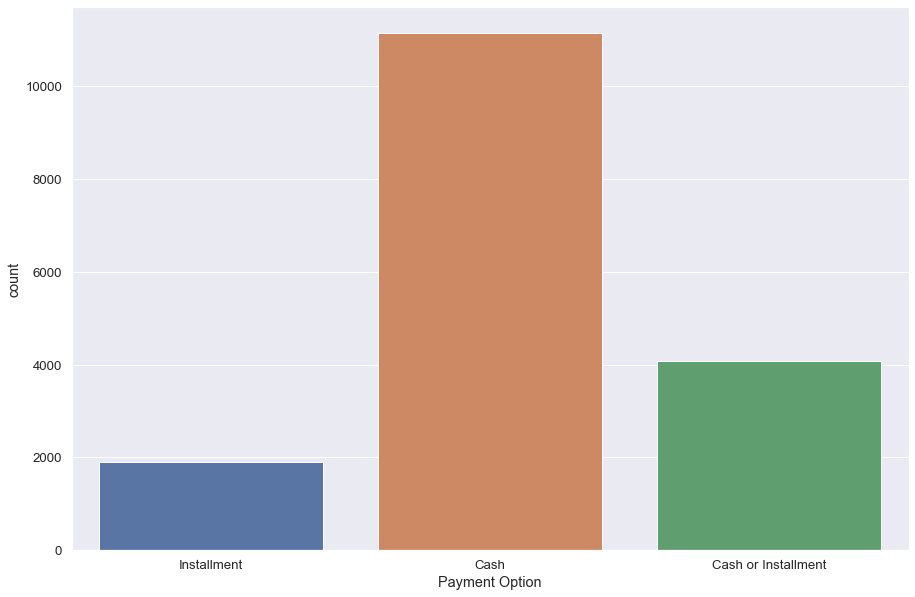

In [56]:
for i in catgorical_columns[4:]:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

<AxesSubplot:>

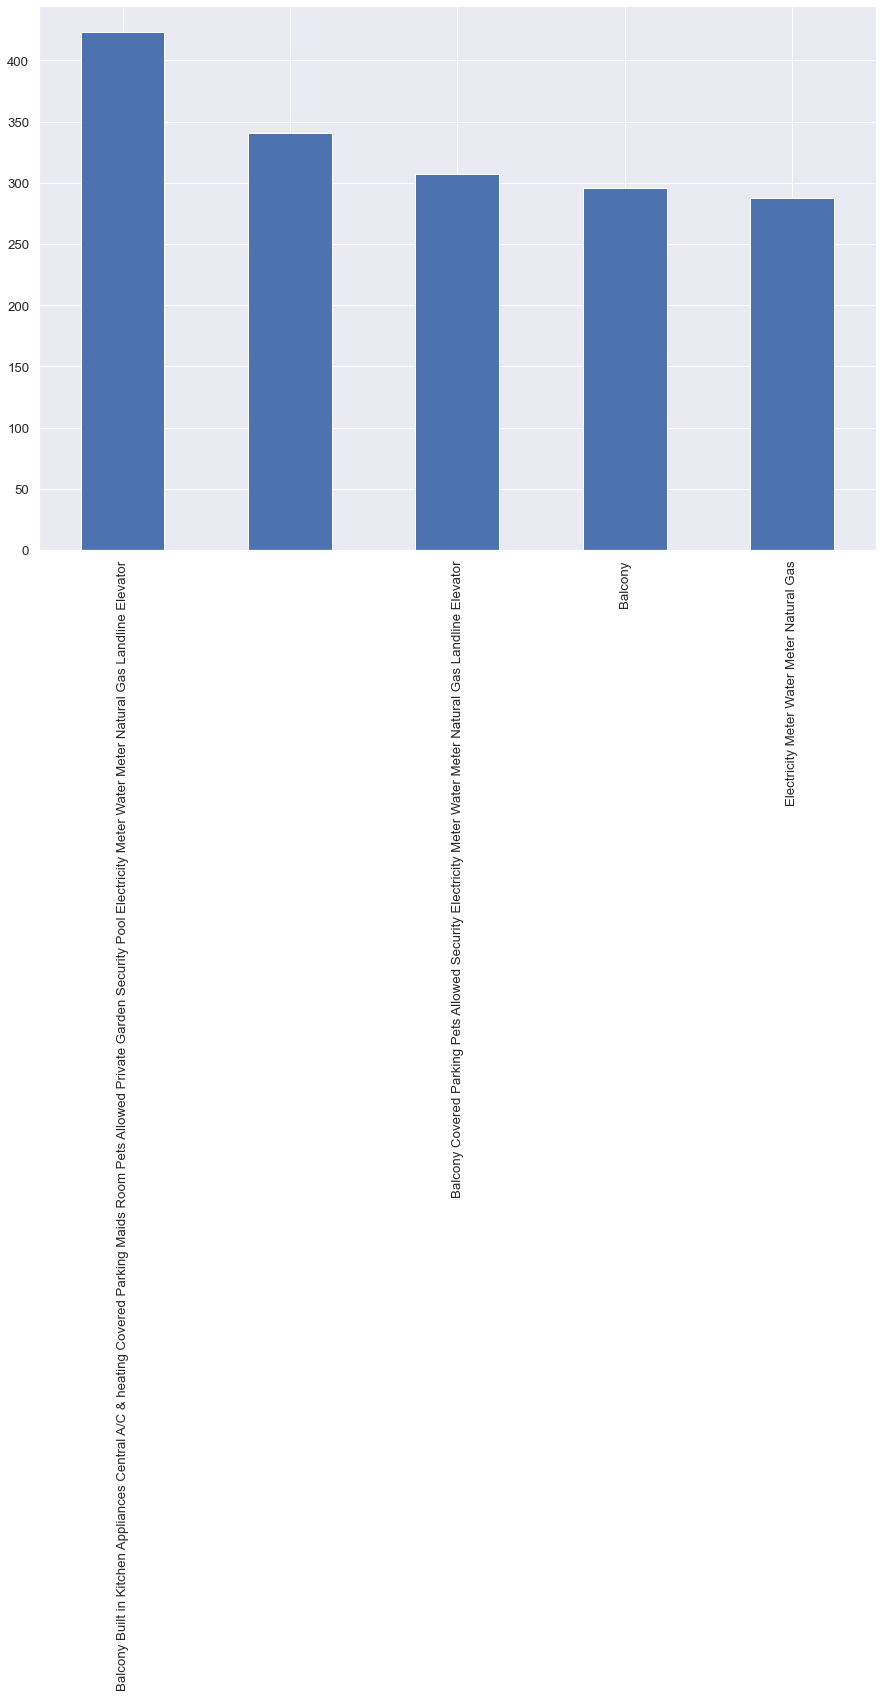

In [57]:
df['Amenities'].value_counts().head(5).plot(kind = 'bar')

>> what is the ratio for each Amenity in Amenities

0.0    0.69858
1.0    0.30142
Name: Parking, dtype: float64


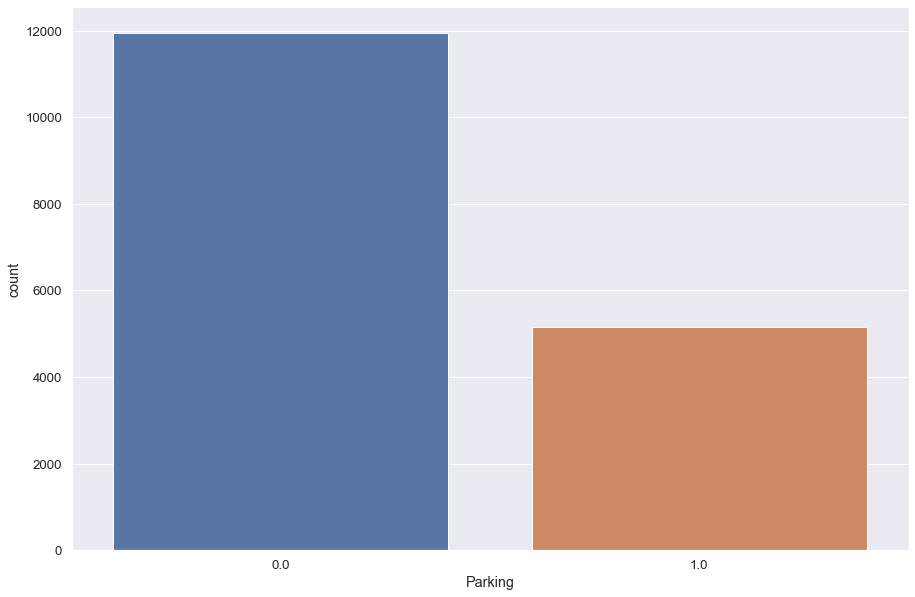

0.0    0.647262
1.0    0.352738
Name: Landline, dtype: float64


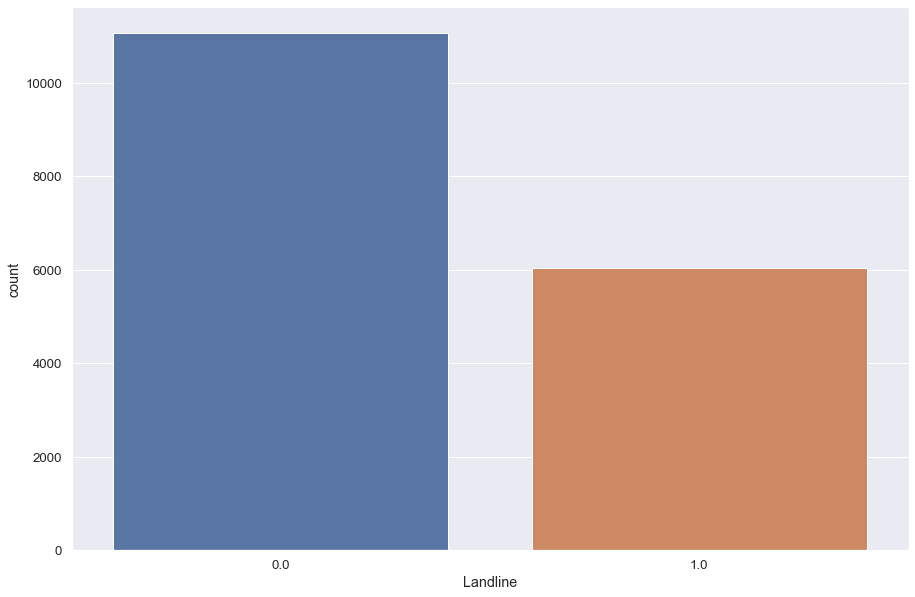

0.0    0.69858
1.0    0.30142
Name: Covered, dtype: float64


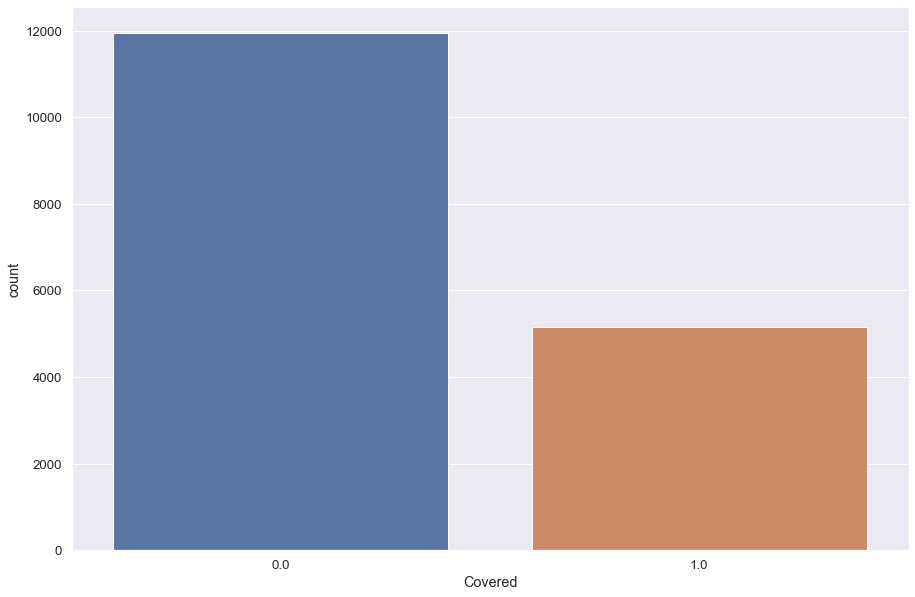

0.0    0.893039
1.0    0.106961
Name: A/C, dtype: float64


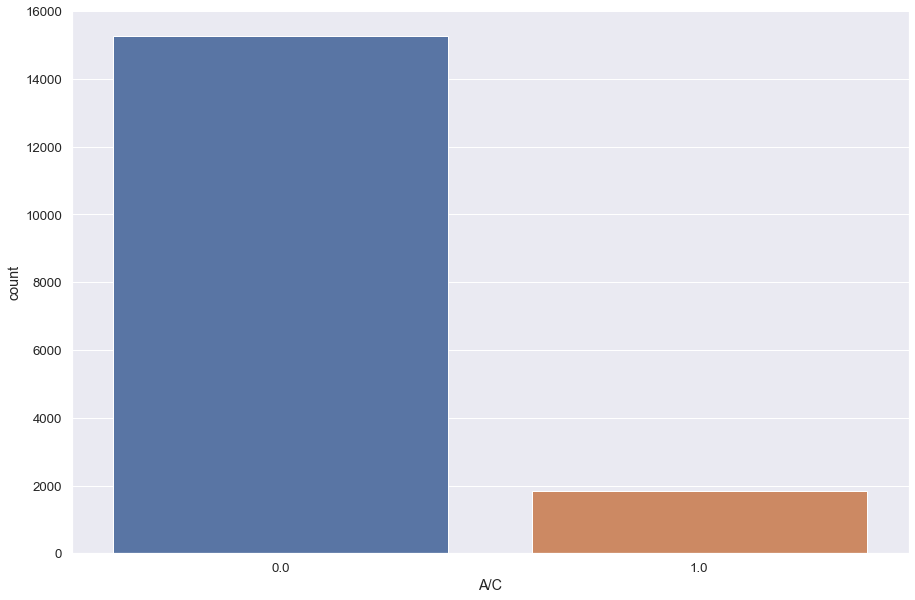

0.0    0.543924
1.0    0.456076
Name: Gas, dtype: float64


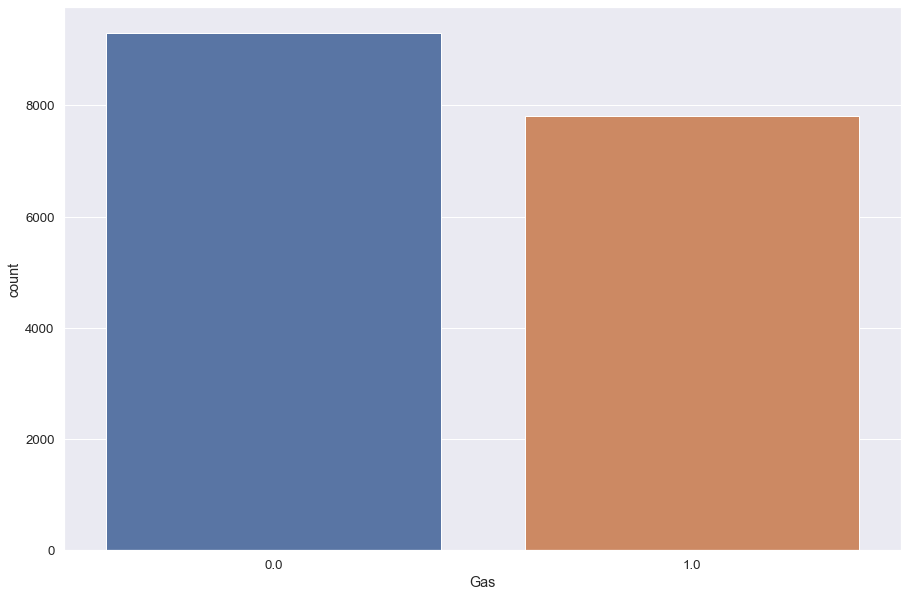

0.0    0.562511
1.0    0.437489
Name: Security, dtype: float64


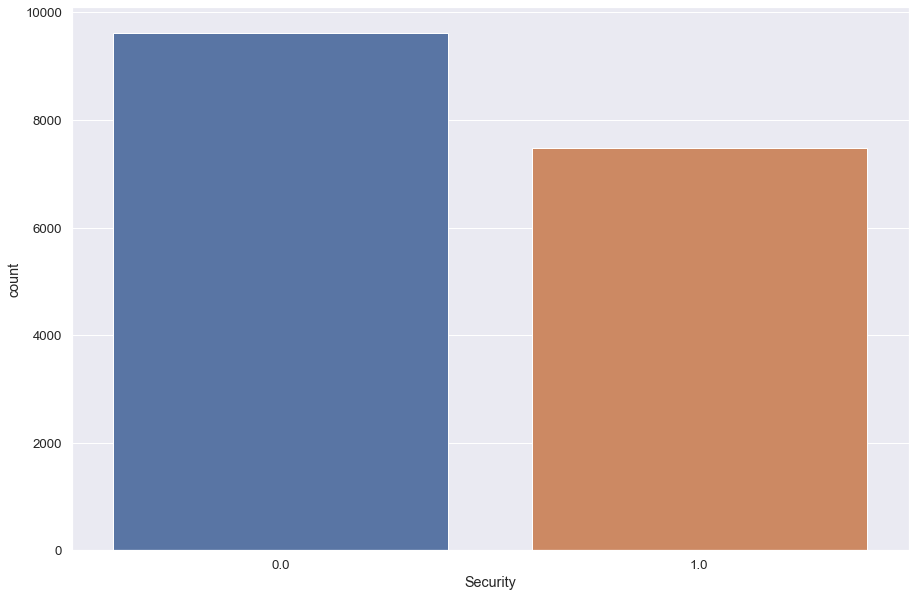

0.0    0.543924
1.0    0.456076
Name: Natural, dtype: float64


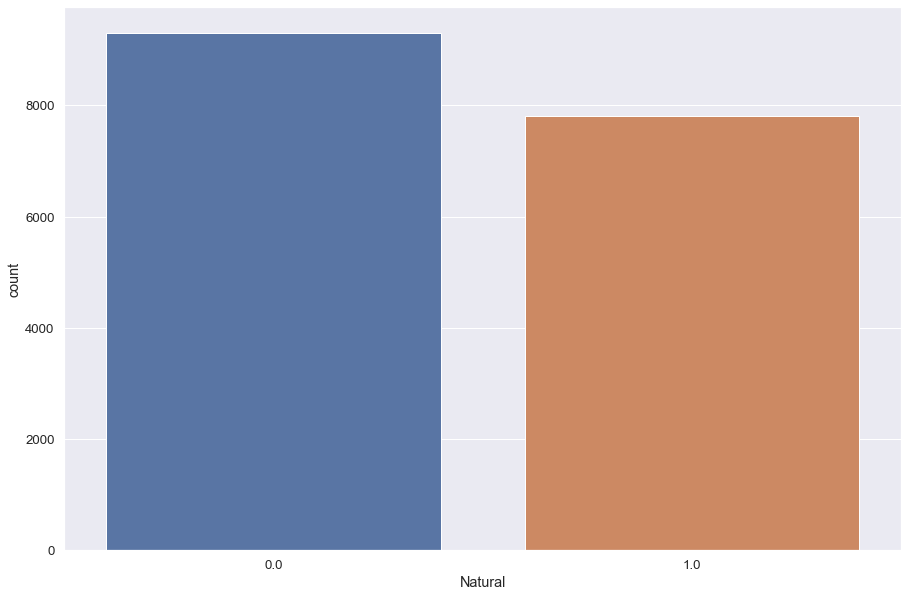

1.0    0.509556
0.0    0.490444
Name: Water, dtype: float64


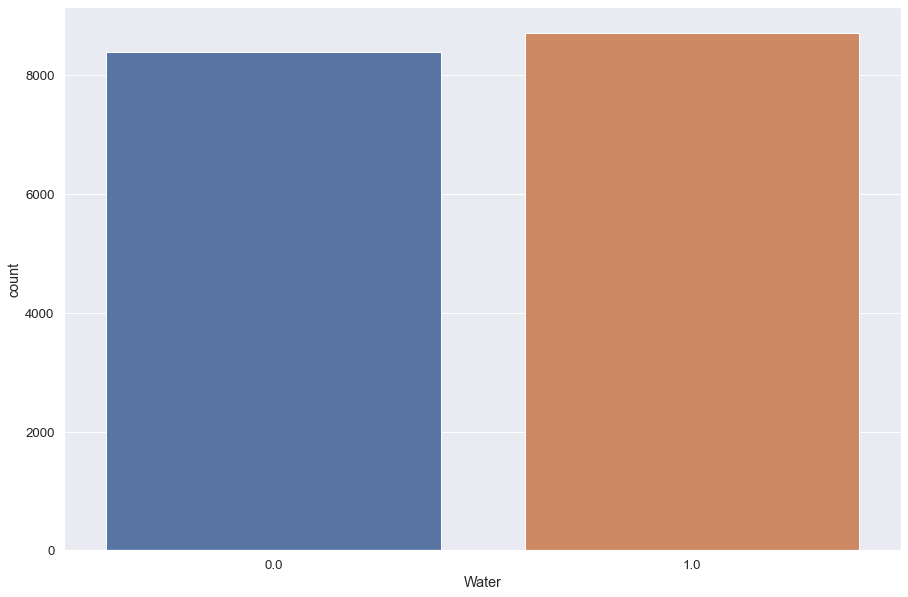

0.0    0.548133
1.0    0.451867
Name: Elevator, dtype: float64


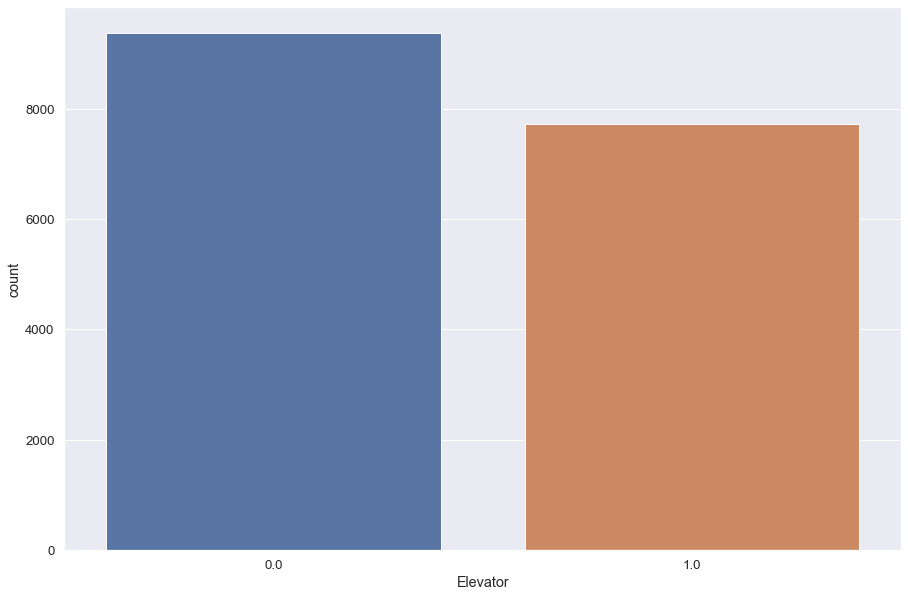

0.0    0.87001
1.0    0.12999
Name: Pool, dtype: float64


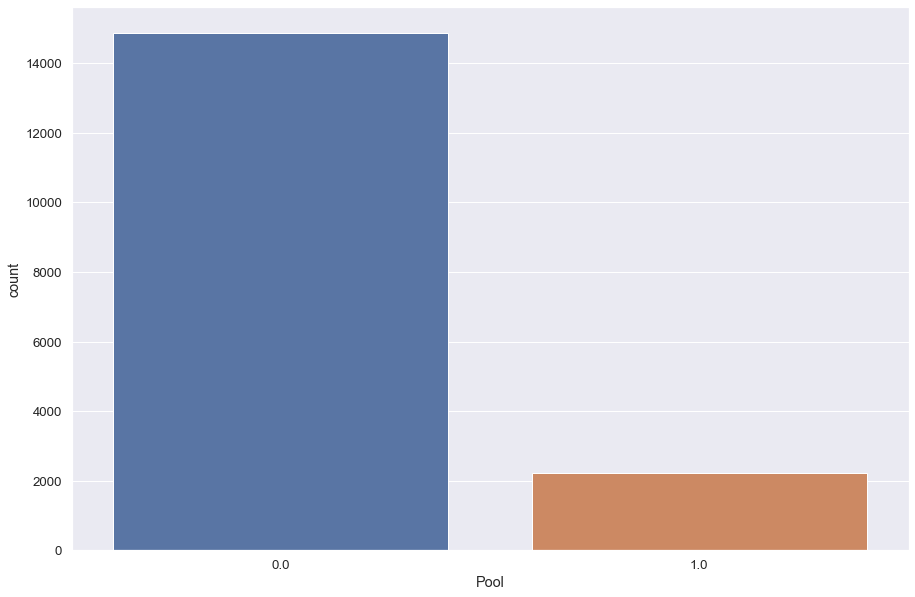

0.0    0.686948
1.0    0.313052
Name: Pets, dtype: float64


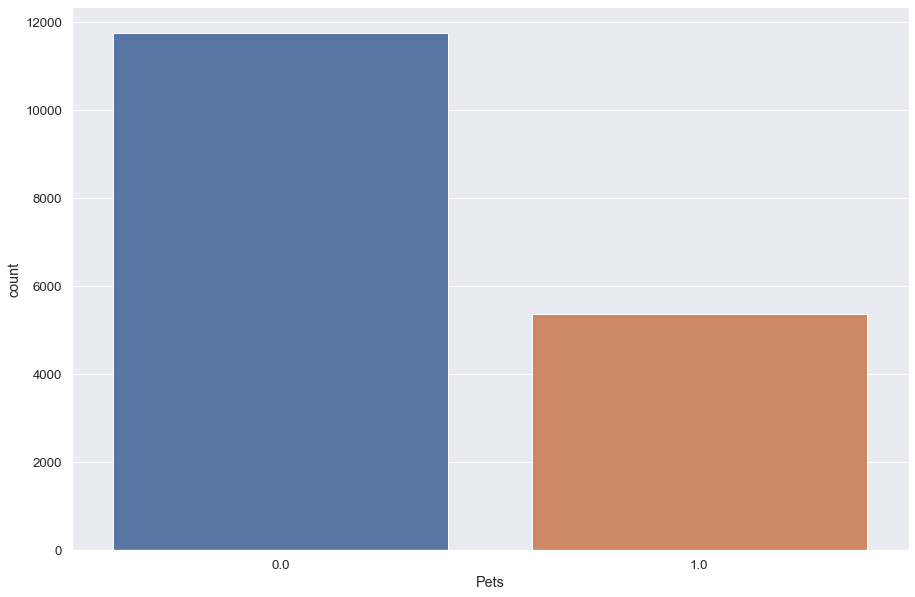

0.0    0.890409
1.0    0.109591
Name: Kitchen, dtype: float64


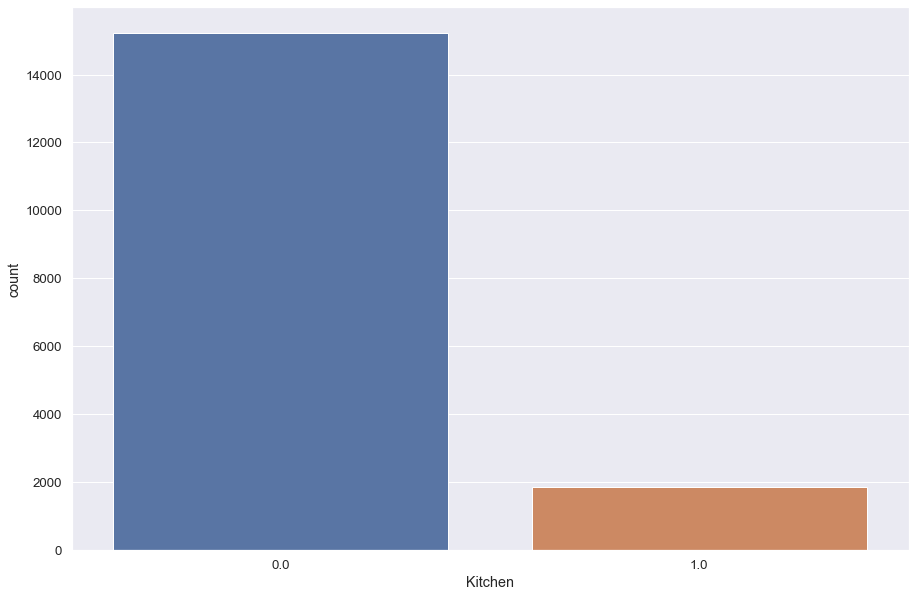

0.0    0.893448
1.0    0.106552
Name: Maids, dtype: float64


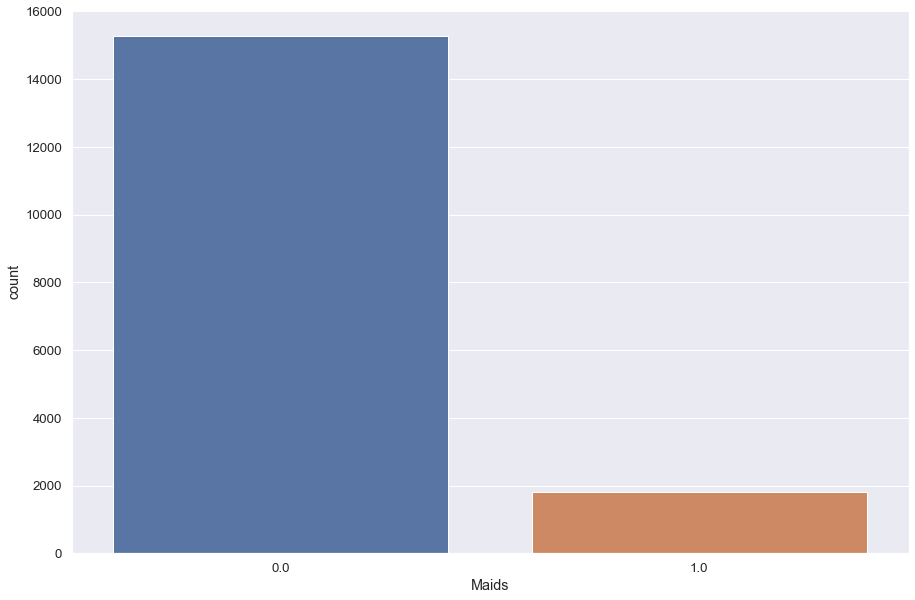

1.0    0.538138
0.0    0.461862
Name: Electricity, dtype: float64


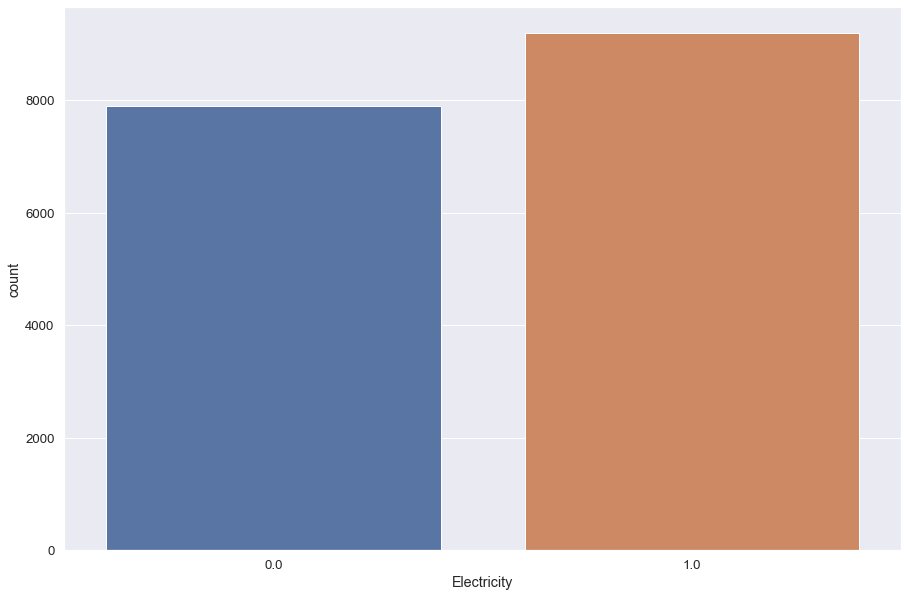

0.0    0.859489
1.0    0.140511
Name: Garden, dtype: float64


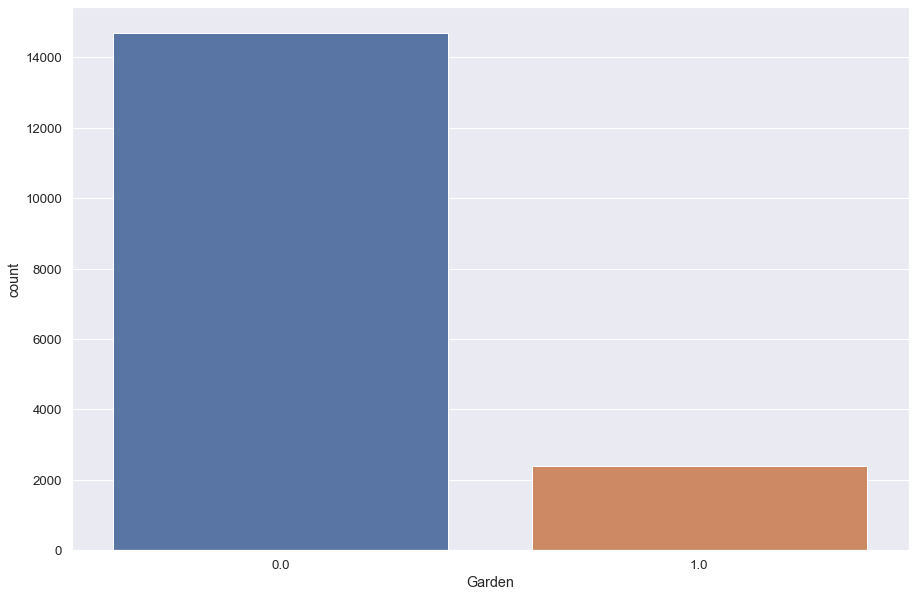

1.0    0.525396
0.0    0.474604
Name: Balcony, dtype: float64


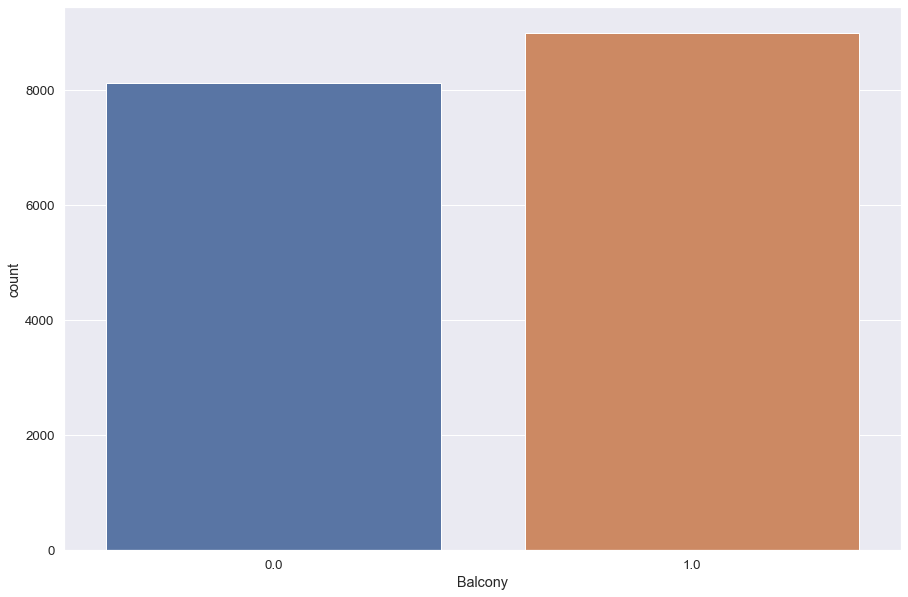

In [58]:
for i in rows:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

>**the most common structure for the villas is**<br>
>4 bedRooms<br>
>4 bathRooms<br>
>semi finished<br>
>**The most common Amenity is security**<br>
>**the most common Amenities for the villas is**<br>
>-Balcony Built in Kitchen Appliances Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline Elevator<br>

>****Bivariate****

In [59]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option","negotiable",'Level']
df['Bedrooms']=df['Bedrooms'].astype('category')
df['Bathrooms']=df['Bathrooms'].astype('category')
df['Furnished']=df['Furnished'].astype('category')
df['Level']=df['Level'].astype('category')
df['negotiable']=df['negotiable'].astype('category')

>the value that appears most  in  the dataframe


In [60]:
df.mode(axis=0, numeric_only=False, dropna=True)
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Level                0
Type                 0
Payment Option       0
Amenities         5051
Furnished            0
Delivery Date        0
Compound             0
Delivery Term        0
month                0
meter_price          0
Parking              0
Landline             0
Covered              0
A/C                  0
Gas                  0
Security             0
Natural              0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

>-***so I need to measure the average price for each category in categorical columns to see how the design affects the price and select the best design to recommend to real state companies***<br>
>-***and see if the most common strucure avrage cost***<br>
>-***Let's see where public taste is heading***



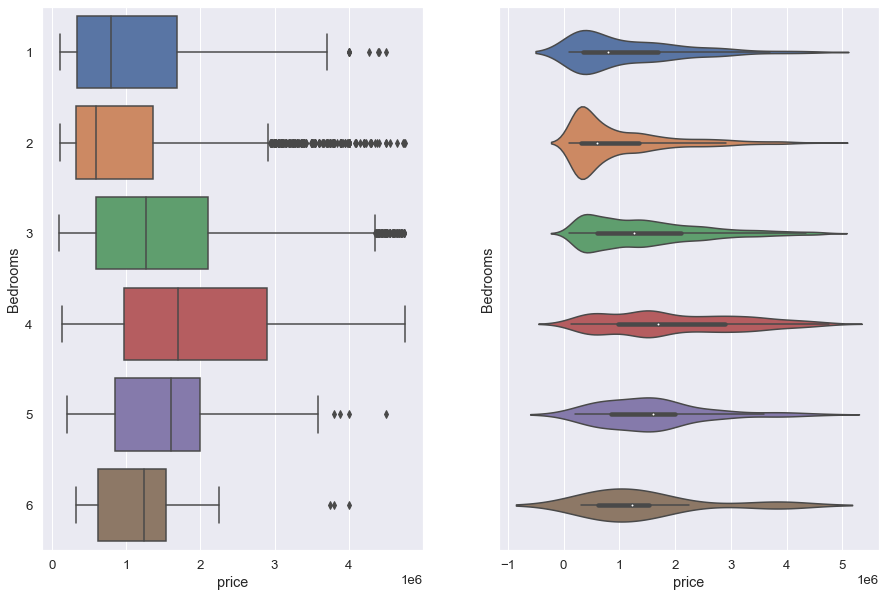

             Mean   Median
Bedrooms                  
1         1130898   795000
2          978479   600000
3         1478909  1266250
4         1978234  1700000
5         1568024  1600000
6         1449318  1235000


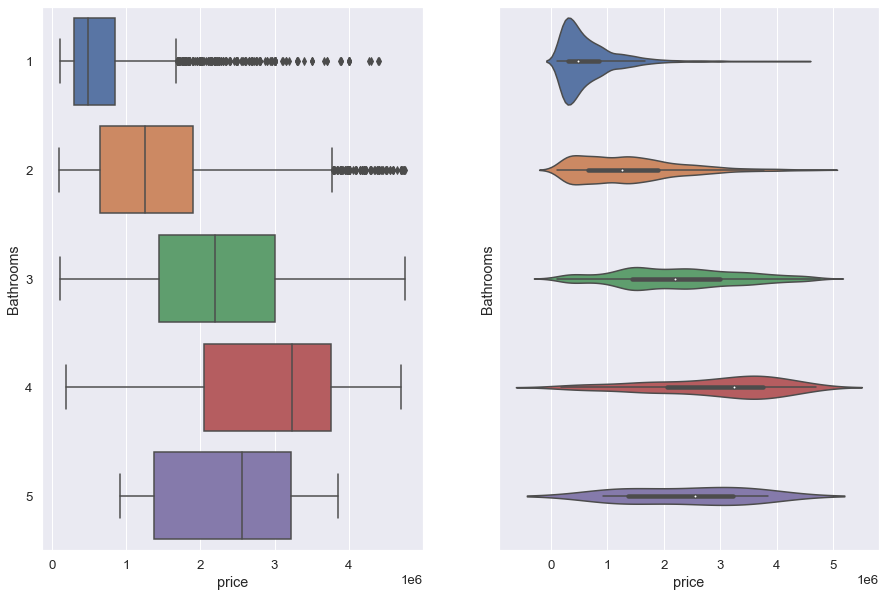

              Mean   Median
Bathrooms                  
1           654920   480000
2          1386364  1250000
3          2245011  2200000
4          2895429  3238000
5          2393850  2557500


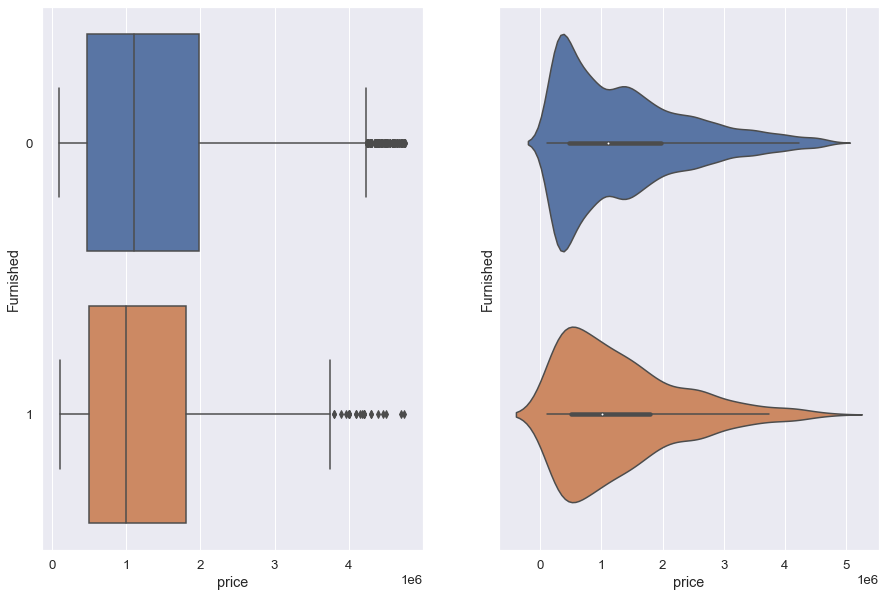

              Mean   Median
Furnished                  
0          1362779  1100000
1          1314106  1000450


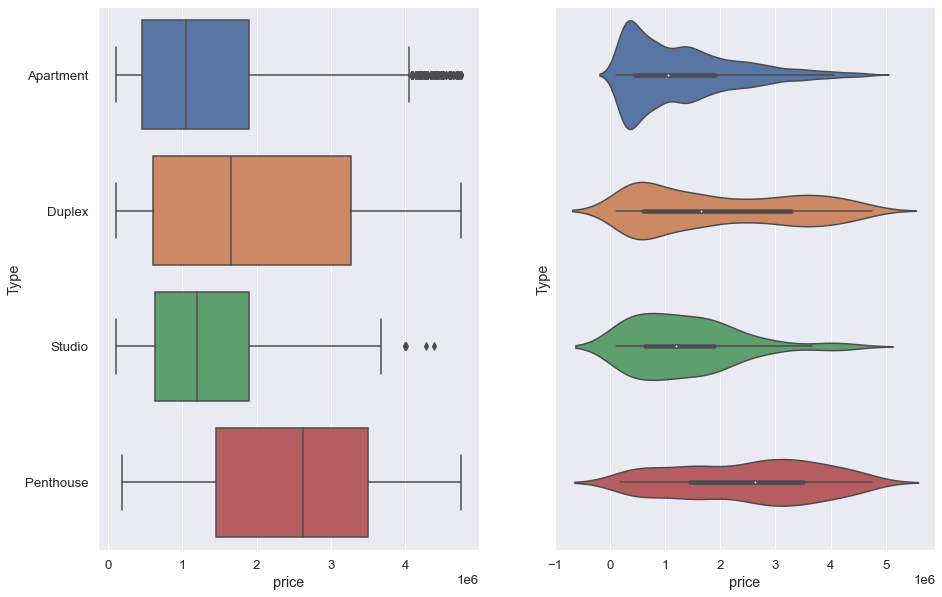

              Mean   Median
Type                       
Apartment  1319746  1050000
Duplex     1961666  1650000
Penthouse  2476605  2625000
Studio     1367287  1200000


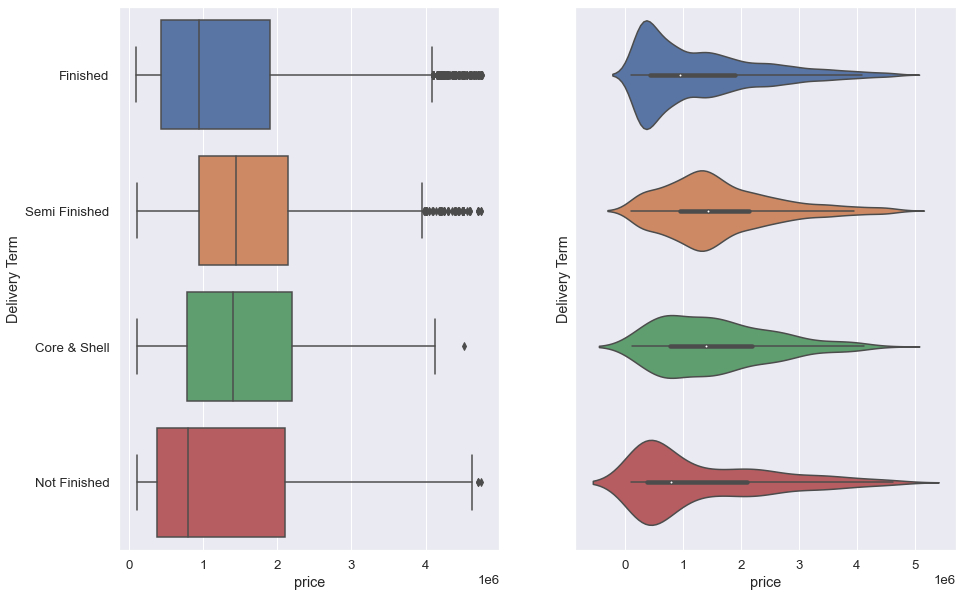

                  Mean   Median
Delivery Term                  
Core & Shell   1562786  1400000
Finished       1302947   950000
Not Finished   1323827   800000
Semi Finished  1626908  1437500


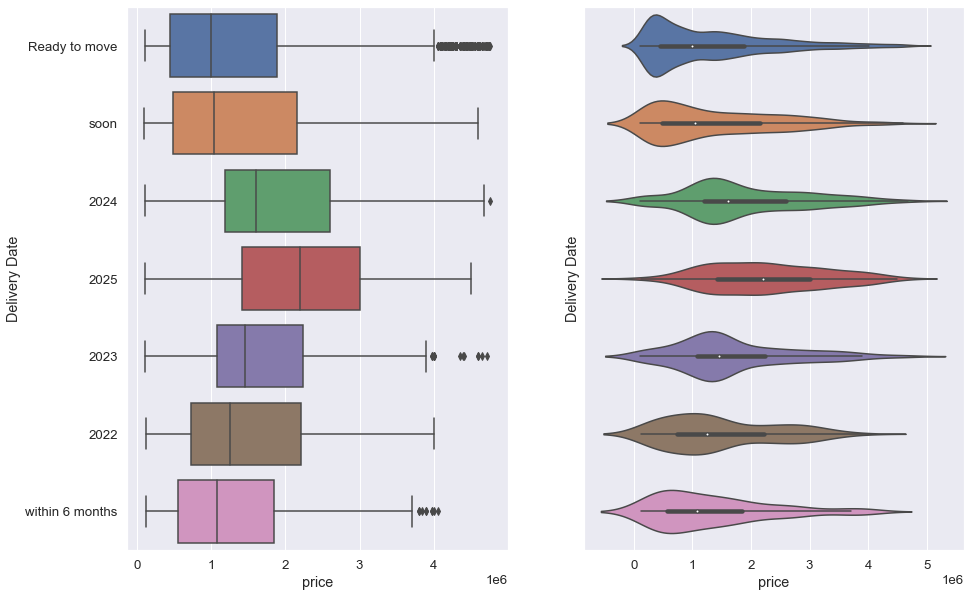

                    Mean   Median
Delivery Date                    
2022             1471280  1250000
2023             1682645  1450000
2024             1883599  1607775
2025             2254438  2200000
Ready to move    1315830  1000000
soon             1382985  1045000
within 6 months  1355177  1080000


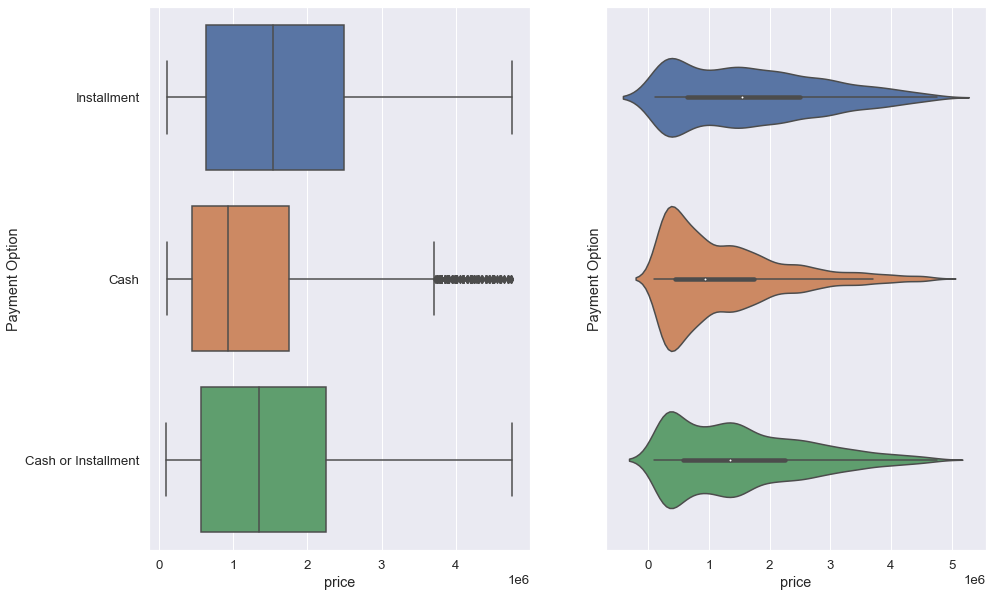

                        Mean   Median
Payment Option                       
Cash                 1242591   935000
Cash or Installment  1526383  1347375
Installment          1696588  1540000


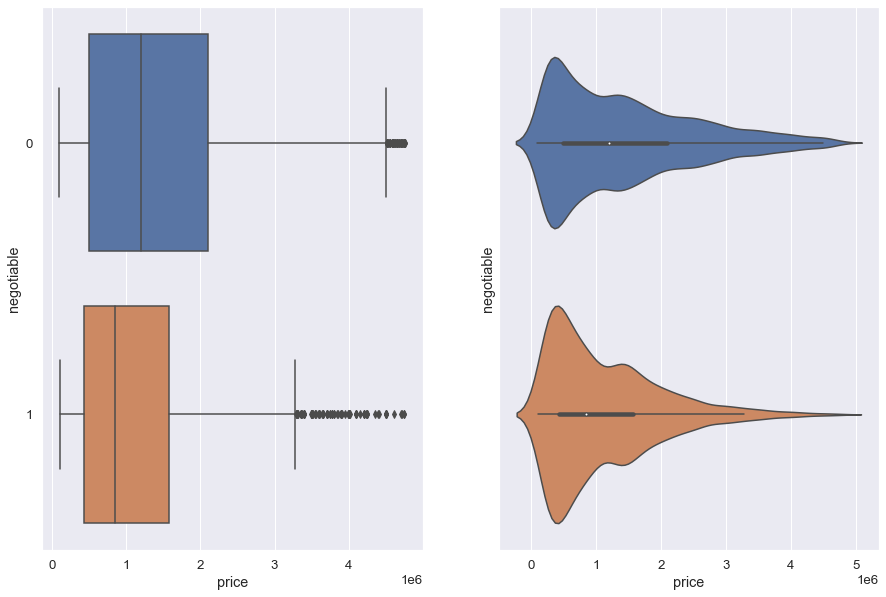

               Mean   Median
negotiable                  
0           1435242  1200000
1           1114244   850000


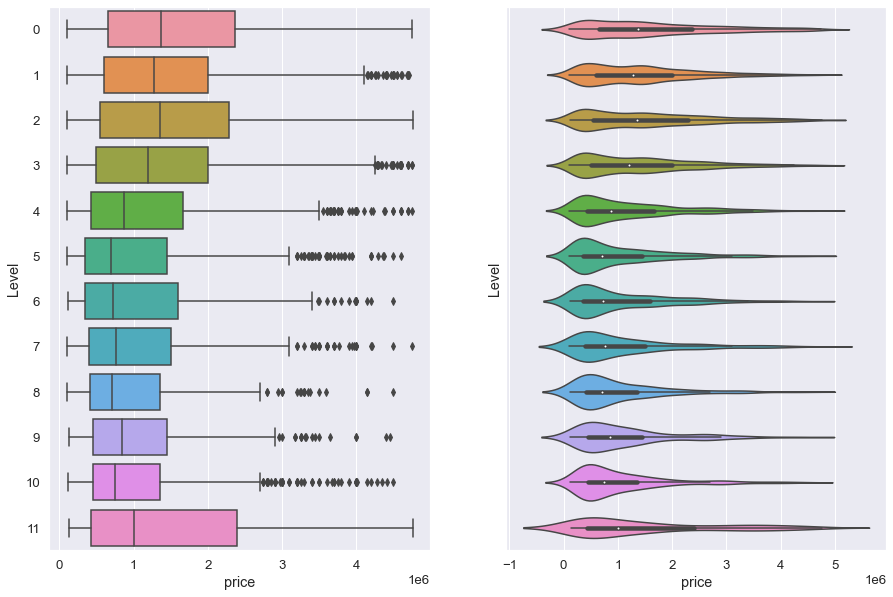

          Mean   Median
Level                  
0      1636697  1370000
1      1409777  1275000
2      1547272  1350000
3      1391351  1200000
4      1177335   870000
5      1036754   700000
6      1066587   720000
7      1110563   770000
8       994312   705000
9      1116425   850000
10     1047441   750000
11     1504526  1000000


In [61]:
for column_name in catgorical_columns:

    print('=' * 80)
    
    x = 'price'
    
    fig, axs = plt.subplots(1, 2, sharey = True)
    sns.boxplot(data = df, x = x, y = column_name, ax = axs[0])
    sns.violinplot(data = df, x = x, y = column_name, ax = axs[1])
    plt.show()
    
    means = df.groupby(column_name)[x].mean()
    medians = df.groupby(column_name)[x].median()

    statsicates = pd.DataFrame()
    statsicates['Mean'] = means
    statsicates['Median'] = medians
    statsicates[['Mean', 'Median']] = statsicates[['Mean', 'Median']].astype(int)
    print(statsicates)

>- in this graph i display the Area ,price and the Payment Option for each category in type 

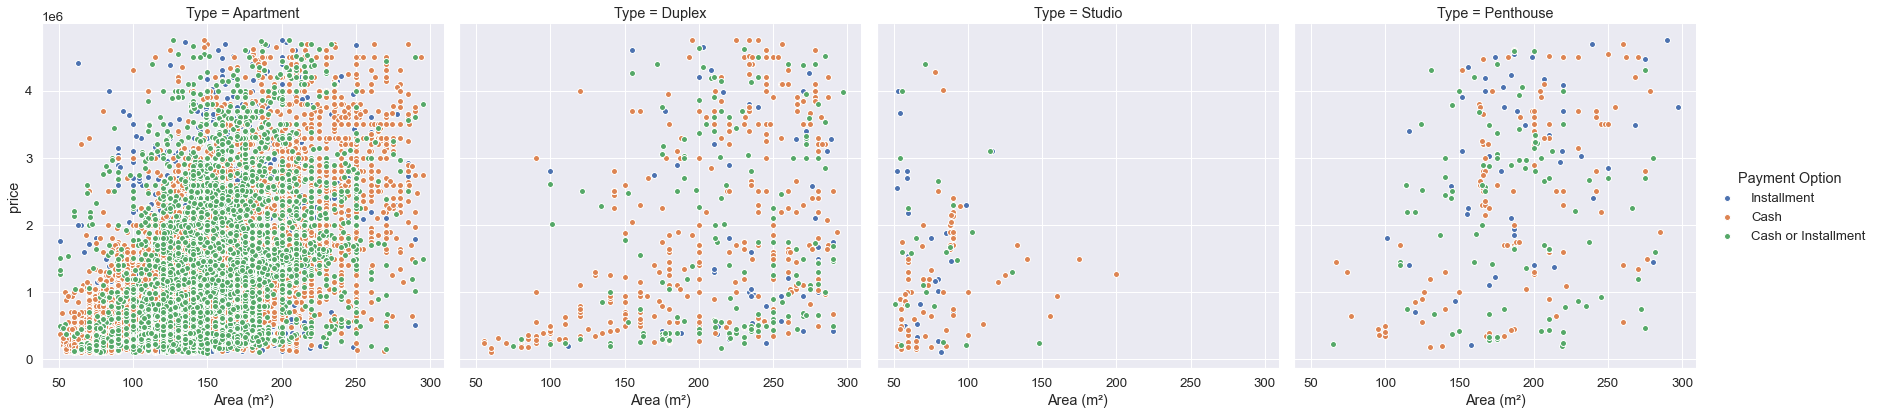

In [62]:
sns.FacetGrid(df, col ="Type",  hue ="Payment Option",height=6).map(plt.scatter,"Area (m²)",  "price", edgecolor ="w").add_legend()

> is the Type Payment Option effect on the area
>> and from this grapgh i figer_out
    

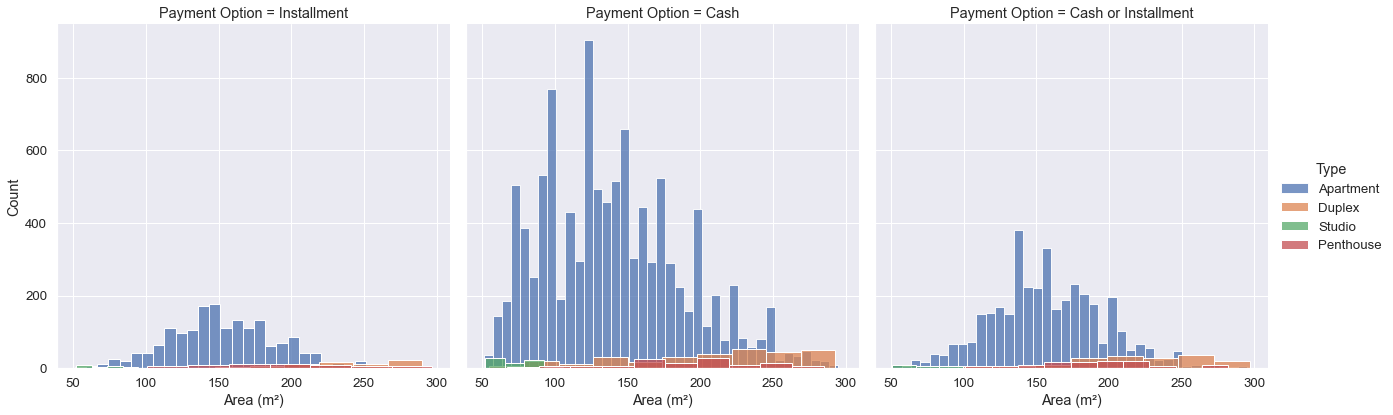

In [63]:
sns.FacetGrid(df, hue="Type", col="Payment Option",height=6).map_dataframe(sns.histplot, x="Area (m²)").add_legend()

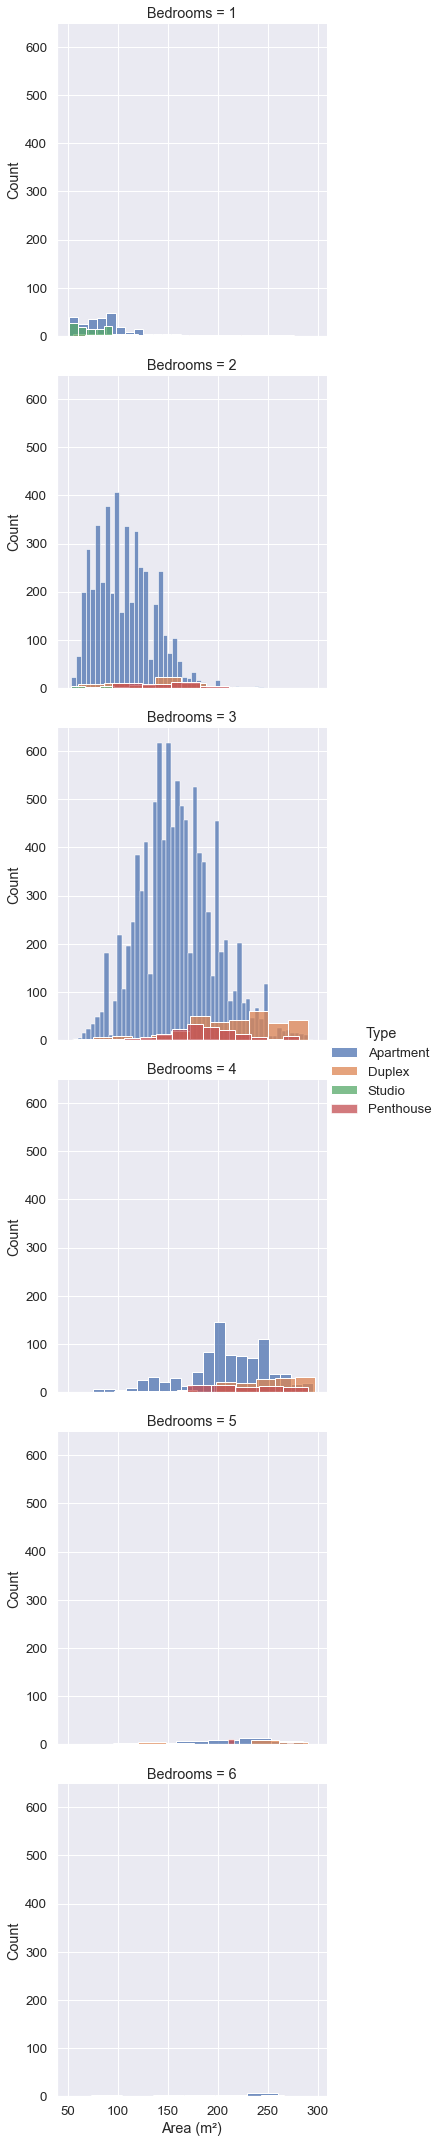

In [64]:
sns.FacetGrid(df, hue="Type", row="Bedrooms",height=5).map_dataframe(sns.histplot, x="Area (m²)").add_legend()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17109 entries, 0 to 17108
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           17109 non-null  int64         
 1   location        17109 non-null  object        
 2   date            17109 non-null  datetime64[ns]
 3   viwers          17109 non-null  int32         
 4   negotiable      17109 non-null  category      
 5   Bedrooms        17109 non-null  category      
 6   Bathrooms       17109 non-null  category      
 7   Area (m²)       17109 non-null  int32         
 8   Level           17109 non-null  category      
 9   Type            17109 non-null  object        
 10  Payment Option  17109 non-null  object        
 11  Amenities       12058 non-null  object        
 12  Furnished       17109 non-null  category      
 13  Delivery Date   17109 non-null  object        
 14  Compound        17109 non-null  object        
 15  De

<AxesSubplot:xlabel='Delivery Term', ylabel='Type'>

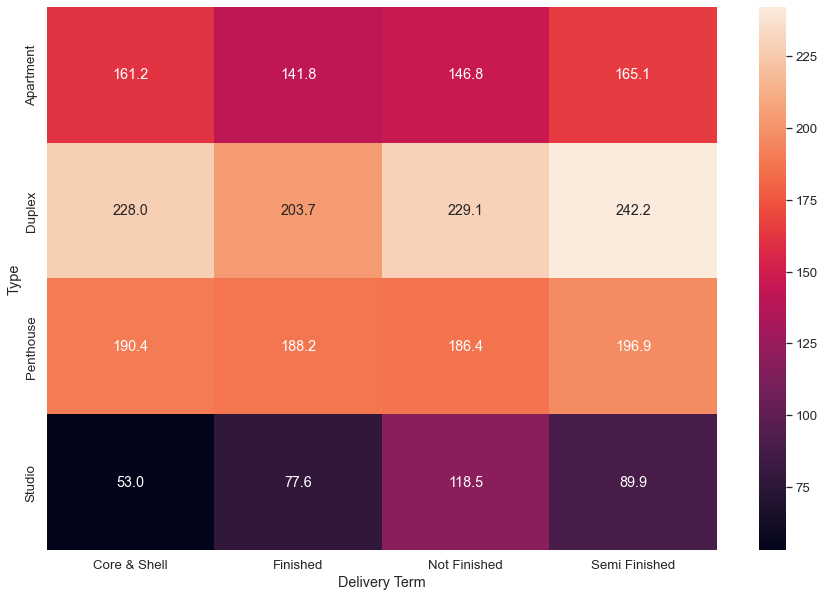

In [66]:
g=df.pivot_table(index='Type', columns='Delivery Term', values='Area (m²)')
sns.heatmap(g, annot=True, fmt=".1f")

<AxesSubplot:xlabel='Bathrooms', ylabel='Bedrooms'>

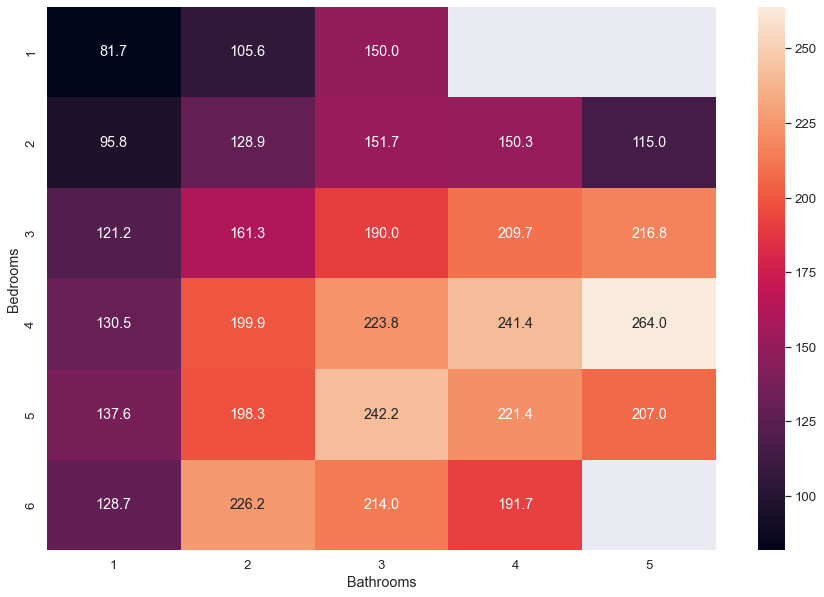

In [67]:
g=df.pivot_table(index='Bedrooms', columns='Bathrooms', values='Area (m²)')
sns.heatmap(g, annot=True, fmt=".1f")

>from these graphs I finger out <br>
>- the average price of unnegotiable prices  is higher than negotiable prices so it is the most common convention between the seller and buyer<br>
>- and as all of us prefer in payment options when u a seller is to take all your money all at once so the average price of the cash category is the height <br> 
>- the most use of the OLX is real seller to avoid the fees of house broker<br>
>- and many companies offer only instrumental payment option and that gives us probity this project Not completed yet and I don’t recommend this type of online sellers <br>
>- as we see in the Delivery date column the ready to move has the most average price because it’s a villa so it u will have summer watermelon in your tummy when u will buy the property<br>
>- the average price of the finished category is the height because the finishing process has been done<br>
>- the average price of Furnished (on the key) category is the heights because it ready to move on it without any afford<br> 

>- if u someones whose work real estate investment or broker   


<AxesSubplot:xlabel='price'>

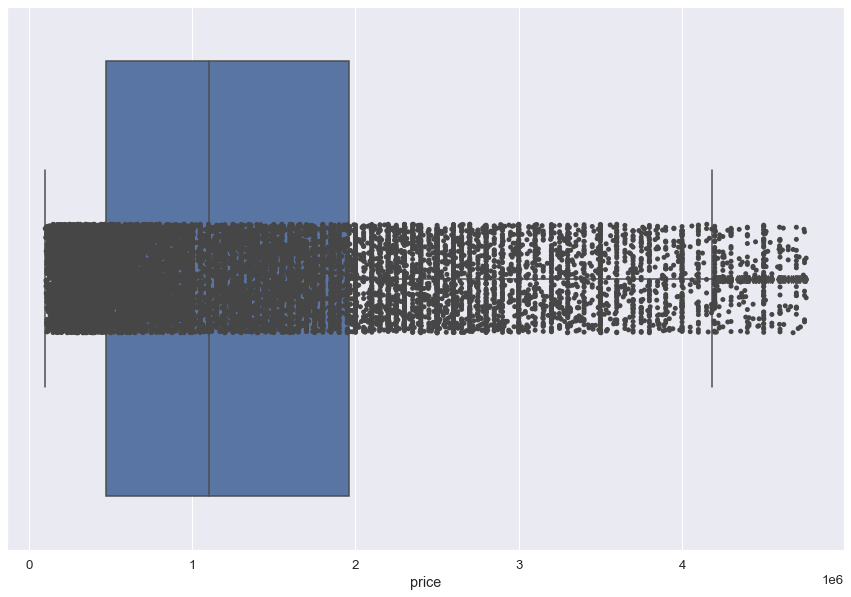

In [68]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


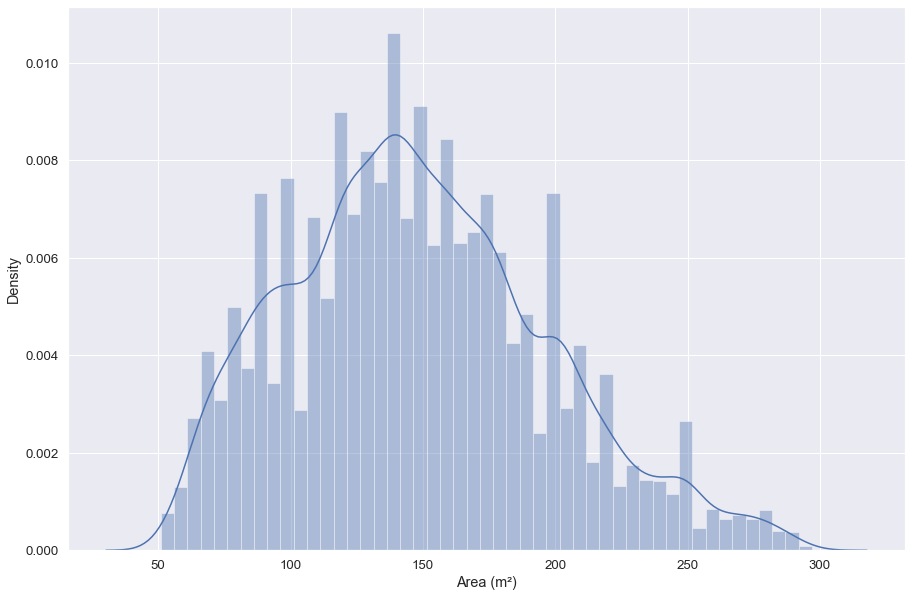

In [69]:
ax = sns.distplot(df["Area (m²)"])


c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


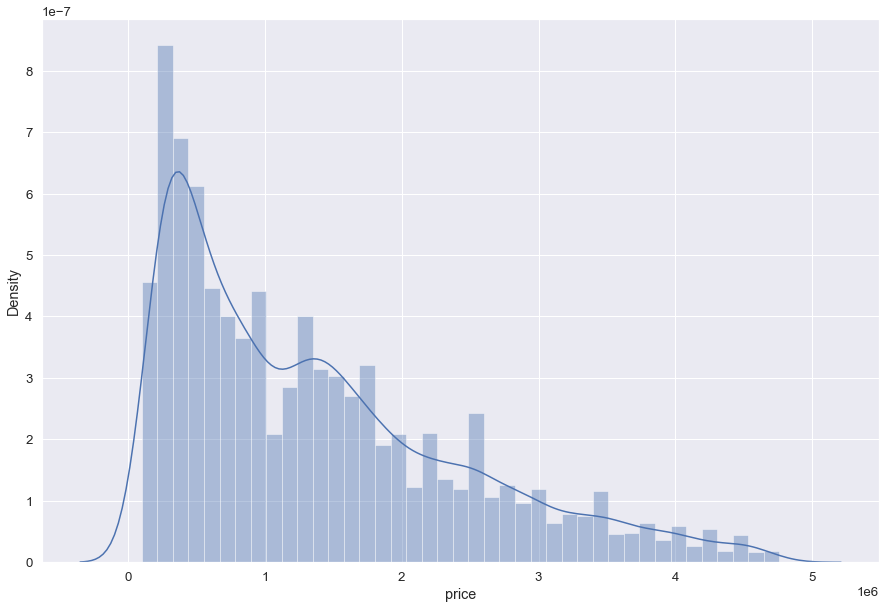

In [70]:
ax = sns.distplot(df["price"])


In [71]:
df['Bedrooms']=df['Bedrooms'].astype('int')
df['Bathrooms']=df['Bathrooms'].astype('int')

In [72]:
df.reset_index(drop=True,inplace=True)

In [73]:
for i in ['Bathrooms','Bedrooms']:
    df[i]=df[i].astype(int)

In [74]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Level                0
Type                 0
Payment Option       0
Amenities         5051
Furnished            0
Delivery Date        0
Compound             0
Delivery Term        0
month                0
meter_price          0
Parking              0
Landline             0
Covered              0
A/C                  0
Gas                  0
Security             0
Natural              0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
ll=[]
for i in ['location','Type', 'Payment Option','Compound','Delivery Term','Delivery Date']:
    ll.append(df[i].unique())
ll

[array(['Smoha، Alexandria', 'Nasr City، Cairo', 'New Capital City, Cairo',
        'New Cairo - El Tagamoa، Cairo', 'Sheikh Zayed، Giza',
        '6th of October، Giza', 'Shorouk City، Cairo',
        'New Capital City، Cairo', 'Maadi، Cairo',
        'New Cairo - El Tagamoa, Cairo', 'Mostakbal City، Cairo',
        '6th of October, Giza', 'Giza District، Giza',
        'Marsa Matrouh، Matruh', 'Hadayek 6th of October، Giza',
        'Marg، Cairo', 'Gesr Al Suez، Cairo', '10th of Ramadan، Sharqia',
        'Hadayek al-Ahram، Giza', 'Faisal، Giza', 'Madinaty, Cairo',
        'Sidi Beshr، Alexandria', 'Ain Shams، Cairo', 'Madinaty، Cairo',
        'Badr City، Cairo', 'Hadayek al-Kobba، Cairo',
        'Gesr Al Suez, Cairo', 'Agami، Alexandria', 'Ard El Lewa، Giza',
        'Azarita، Alexandria', 'Al Amiriyyah، Cairo', 'Helwan، Cairo',
        'Hurghada, Red Sea', 'Haram، Giza', 'Saba Pasha، Alexandria',
        'New Nozha، Cairo', 'Hadayek al-Ahram, Giza', 'Faisal, Giza',
        'Matar

In [77]:
x=df.drop(['price','viwers','date','negotiable','month','Amenities'],axis=1)
y = df['price']

In [78]:
def transform_d(data, column_name, categories, is_ordinal = False, asserted = True):
    
    df = data.copy(deep = True)
    
    if asserted:
        assert df[column_name].apply(lambda x: x in categories).all()
    
    column_series = df[column_name]
    df.drop(column_name, axis = 1, inplace = True)
    
    if is_ordinal:

        d = {x : i + 1 for i, x in enumerate(categories)}
        column_series.replace(d, inplace = True)
        
        df[column_name] = column_series
    
    else:
        
        columns = [f'{column_name}: {x}' for x in categories]
        temp_df = column_series.apply(lambda x: pd.Series([int(y == x) for y in categories]))
        temp_df.columns = columns
        
        df = df.join(temp_df)
        
    return df
        
        
def transform_c(data, column_name):
    
    df = data.copy(deep = True)
    
    column_series = df[column_name]
    df.drop(column_name, axis = 1, inplace = True)
    df[column_name] = column_series
    
    return df
    
    
def transform(data, column_name, categories = None, is_ordinal = False, asserted = True):

    if categories is None:
        
        return transform_c(data, column_name)
        
    return transform_d(data, column_name, categories, is_ordinal, asserted)
    

def transform_features(X_df):    
    #Column: manufacturer
    
    categories = ['Smoha، Alexandria', 'Nasr City، Cairo', 'New Capital City, Cairo',
        'New Cairo - El Tagamoa، Cairo', 'Sheikh Zayed، Giza',
        '6th of October، Giza', 'Shorouk City، Cairo',
        'New Capital City، Cairo', 'Maadi، Cairo',
        'New Cairo - El Tagamoa, Cairo', 'Mostakbal City، Cairo',
        '6th of October, Giza', 'Giza District، Giza',
        'Marsa Matrouh، Matruh', 'Hadayek 6th of October، Giza',
        'Marg، Cairo', 'Gesr Al Suez، Cairo', '10th of Ramadan، Sharqia',
        'Hadayek al-Ahram، Giza', 'Faisal، Giza', 'Madinaty, Cairo',
        'Sidi Beshr، Alexandria', 'Ain Shams، Cairo', 'Madinaty، Cairo',
        'Badr City، Cairo', 'Hadayek al-Kobba، Cairo',
        'Gesr Al Suez, Cairo', 'Agami، Alexandria', 'Ard El Lewa، Giza',
        'Azarita، Alexandria', 'Al Amiriyyah، Cairo', 'Helwan، Cairo',
        'Hurghada, Red Sea', 'Haram، Giza', 'Saba Pasha، Alexandria',
        'New Nozha، Cairo', 'Hadayek al-Ahram, Giza', 'Faisal, Giza',
        'Matareya، Cairo', 'Mansura، Dakahlia', 'Al Hadrah، Alexandria',
        'Mohandessin، Giza', 'Helmeyat El Zaytoun، Cairo', 'Tersa، Giza',
        'Miami, Alexandria', 'Rehab City، Cairo', 'Stanley، Alexandria',
        'Laurent، Alexandria', 'Tanta، Gharbia', 'Ezbet El Nakhl، Cairo',
        'Awayed، Alexandria', 'Asyut City، Asyut', 'Suez District، Suez',
        'Nakheel، Alexandria', 'Sayeda Zeinab، Cairo',
        'Moharam Bik، Alexandria', 'Mokattam، Cairo',
        'San Stefano، Alexandria', 'Ras al-Bar، Damietta', 'Maadi, Cairo',
        'Fleming، Alexandria', 'Mahalla al-Kobra، Gharbia',
        'Giza District, Giza', 'Rehab City, Cairo', 'Sheikh Zayed, Giza',
        'Zagazig، Sharqia', 'Sidi Gaber، Alexandria',
        'Markaz Sohag، Sohag', 'Haram, Giza', 'Hurghada، Red Sea',
        'Hadayek Helwan، Cairo', 'Dokki، Giza', 'Downtown Cairo، Cairo',
        'Obour City, Cairo', 'Waili، Cairo', 'Nakheel, Alexandria',
        'Khosous، Qalyubia', 'Warraq، Giza', 'Heliopolis, Cairo',
        'Zawya al-Hamra، Cairo', 'Mansura, Dakahlia',
        'Zohour District، Port Said', 'Sharq District، Port Said',
        'Obour City، Cairo', 'Heliopolis، Cairo',
        'Al Ibrahimiyyah, Alexandria', 'Al Ibrahimiyyah، Alexandria',
        'Maryotaya، Giza', 'Zahraa Al Maadi، Cairo',
        'Shubra al-Khaimah، Qalyubia', 'Seyouf، Alexandria',
        'Mandara، Alexandria', 'Agami, Alexandria', 'Victoria، Alexandria',
        'Hadayek 6th of October, Giza', 'Abu Talat، Alexandria',
        'Bahtim، Qalyubia', 'Shorouk City, Cairo',
        'Beni Suef City، Beni Suef', 'Wardian، Alexandria',
        'Shubra، Cairo', 'Agouza، Giza', 'Asafra، Alexandria',
        'Salam City، Cairo', 'Nasr City, Cairo', 'Abu Qir، Alexandria',
        'Al Manial، Cairo', 'Schutz، Alexandria',
        'Ismailia City، Ismailia', 'Sporting، Alexandria',
        'Bacchus، Alexandria', 'Damanhour، Beheira',
        'Ganoub District، Port Said', 'Miami، Alexandria',
        '15 May City، Cairo', 'Camp Caesar، Alexandria',
        'Fayoum City، Fayoum', 'Kafr Abdo، Alexandria',
        'Dahab Island and Coldair، Giza', 'Zezenia، Alexandria',
        'Tanta, Gharbia', 'Glim، Alexandria', 'Cleopatra، Alexandria',
        'Zahraa Al Maadi, Cairo', 'Ain Sukhna، Suez',
        'Shebin al-Koum، Monufia', 'Almazah، Cairo',
        'Damietta City، Damietta', 'North Coast، Matruh',
        'Katameya، Cairo', 'Helmeyat El Zaytoun, Cairo', 'Mokattam, Cairo',
        'New Heliopolis، Cairo', 'Bolkly، Alexandria',
        'Sharm al-Sheikh، South Sinai', 'Borg al-Arab، Alexandria',
        'Sheraton، Cairo', 'New Damietta، Damietta', 'Abasiya، Cairo',
        'Alamein، Matruh', 'Quesna، Monufia', 'Roushdy، Alexandria',
        'Kafr al-Sheikh City، Kafr al-Sheikh', 'Yusuf al-Sadiq، Fayoum',
        'Banha، Qalyubia', 'Montazah، Alexandria', 'Moneeb، Giza',
        'Imbaba، Giza', 'Maamoura، Alexandria', 'Port Fouad، Port Said',
        'Basateen، Cairo', 'Boulaq Dakrour، Giza', 'Minya City، Minya',
        'Shohadaa، Monufia', 'Manakh District، Port Said',
        'Kafr Saad، Damietta', 'Markaz al-Giza، Giza',
        'Dar al-Salaam، Cairo', 'Gamasa، Dakahlia', 'Zamalek، Cairo',
        'Aswan City، Aswan', 'Qena City، Qena', 'Attarin، Alexandria',
        'New Mansoura، Dakahlia', 'Karmous، Alexandria',
        'Saft El Laban، Giza']
    

    
    df = transform(data = X_df,
                   column_name = 'location', 
                   categories = categories, 
                   is_ordinal = False,
                   asserted = True)
    
    ############################################
    
    #Column: condition
    # drop_first=flase 
    df = transform(data = df, 
                   column_name = 'Type', 
                   categories = ['Twin House', 'Town House'], 
                   is_ordinal = False,
                   asserted = False)
    
    ############################################
    
    #Column: cylinders
    
    df = transform(data = df, 
                   column_name = 'Payment Option', 
                   categories = ['Cash', 'Installment'], 
                   is_ordinal = False,
                   asserted = False)
    
    ############################################
    
    #Column: fuel
    
    categories = ['not_in_Compound', 'Atika', 'Mountain View iCity', 'Palm Parks',
        'Al Burouj', 'New Giza', 'Beit Al Watan', 'Beta Greens',
        'Mountain View Hyde Park', 'Castle Landmark', 'Sky Condos Sodic',
        'ZED Towers', 'Dar Misr', 'Kayan', 'Madinaty', '2020 Compound',
        'Mivida', 'IL Bosco', 'El Khamayel', 'Hadaba', 'Rehab City',
        'Badya Palm Hills', 'Beverly Hills', 'Not in Compound', 'De Joya',
        'Ashgar City', 'Galleria Moon Valley', 'Jewar', 'ABHA', 'Nakheel',
        'EL Patio ORO', 'Degla Palms', 'Sun Capital', 'Sodic Westown',
        'The Address East', 'Garden Hills', 'The Loft', 'VGK',
        'Stone Residence', 'Botanica', 'Uptown Cairo',
        'Palm Hills New Cairo', 'Porto New Cairo', 'Sarai', 'Village Gate',
        'Capital Heights 2', 'EL Patio Casa', 'Village West', 'Eco West',
        'Lake view Residence', 'Zayed Dunes', 'Hyde Park New Cairo',
        'Stau', 'The Village', 'Swan Lake', 'El Ashgar District', 'Dyar',
        'Eastown', 'Abu Al-Hool', 'Maadi V', 'Yaru', 'Haptown', 'AZAD',
        'L’Avenir', 'Midtown Sky', 'Tag Sultan', 'Crystal Plaza',
        'Porto October', 'October Plaza Sodic', 'Bloomfields',
        'Italian Square', 'One Kattameya', 'Zed East', 'Fifth Square',
        'Taj City', 'Jayd', 'Andalus', 'Joulz', 'Granda', 'Dreamland',
        'Kenz', 'The Axis', 'IL Bosco City', 'The Brooks', 'Scene 7',
        'Al Yasmine', 'Degla Gardens', 'Amorada', 'Tiba Gardens',
        'Gardenia', 'Sodic East', 'The Estates', 'Tijan', '90 Avenue',
        'Aeon', 'Rhodes', 'Sephora Heights', 'High City', 'Bavaria Town',
        'O West', 'Mountain View Chillout Park', 'Zayed Regency',
        'Next Point', 'Maadi Valley', 'Seabelle', 'The Square',
        'Maadi View', 'Degla Towers', 'Regents Park',
        'Mountain View Executive', 'Etapa']
    
    df = transform(data = df, 
                   column_name = 'Compound', 
                   categories = categories,
                   is_ordinal = False,
                   asserted = True)
    

    
    df = transform(data = df, 
                   column_name = 'Delivery Term', 
                   categories = ['Finished', 'Semi Finished', 'Not Finished'],
                   is_ordinal = False,
                   asserted = False)
    
    
    ############################################
    
        
    df = transform(data = df, 
                   column_name = 'Delivery Date', 
                   categories = ['Ready to move', 'soon', '2025', '2023', '2024', 'within 6 months', '2022'],
                   is_ordinal = False,
                   asserted = True)
    
    return df

In [79]:
x=transform_features(x)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [85]:
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model =  RandomForestRegressor(n_estimators=100,max_depth=60)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)
yt_pred = model.predict(x_train)

print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

Testing RMSE: 26229.708825779064
Testing MAE: 9030.720121552127
Testing R2: 0.9993762504927804


In [86]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']